In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import missingno as msno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.ticker as ticker

# Case Study: Bank Telemarketing Campaign

The bank aims to enhance its revenue by conducting a cost-efficient telemarketing campaign for term deposits among existing customers. Term deposits, fixed investments with predetermined interest rates, serve to foster long-term customer relationships. The objective is to conduct an end-to-end Exploratory Data Analysis (EDA)
on the campaign dataset, identifying patterns and providing insights to improve the positive response rate. The analysis will involve examining customer demographics,
temporal trends, and other factors influencing the success of the campaign, ultimately offering recommendations for targeted improvements in the bank's marketing strategy.

## Task to Perform:

Conduct a thorough Exploratory Data Analysis (EDA) on the dataset related to the bank's telemarketing campaign that should involve the following sequential steps:

## 1. Understanding the Dataset

a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

b. Inspect for any instances of missing values, outliers, or data inconsistencies.

## Load Data: Use Pandas to load the provided Excel file into a DataFrame.

In [2]:
db = pd.read_csv(r"D:\bank_marketing_updated_v1.csv")
db.head()

banking marketing Unnamed: 1                    Unnamed: 2 Unnamed: 3  \
0  customer id and age.        NaN  Customer salary and balance.        NaN   
1            customerid        age                        salary    balance   
2                     1         58                        100000       2143   
3                     2         44                         60000         29   
4                     3         33                        120000          2   

                                          Unnamed: 4              Unnamed: 5  \
0  Customer marital status and job with education...                     NaN   
1                                            marital                  jobedu   
2                                            married     management,tertiary   
3                                             single    technician,secondary   
4                                            married  entrepreneur,secondary   

                                   Unnamed: 6 Unnamed: 7  \
0  particular customer before targeted or not        NaN   
1                                    targeted    default   
2                                         yes         no   
3                                         yes         no   
4                                         yes         no   

                           Unnamed: 8 Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  Loan types: loans or housing loans        NaN  Contact type         NaN   
1                             housing       loan       contact         day   
2                                 yes         no       unknown           5   
3                                 yes         no       unknown           5   
4                                 yes        yes       unknown           5   

        Unnamed: 12       Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0  month of contact  duration of call         NaN         NaN         NaN   
1             month          duration    campaign       pdays    previous   
2         may, 2017           261 sec           1          -1           0   
3         may, 2017           151 sec           1          -1           0   
4         may, 2017            76 sec           1          -1           0   

                   Unnamed: 17                              Unnamed: 18  
0  outcome of previous contact  response of customer after call happned  
1                     poutcome                                 response  
2                      unknown                                       no  
3                      unknown                                       no  
4                      unknown                                       no

## Load Data without unnecessary headers.

In [3]:
df = pd.read_csv(r"D:\bank_marketing_updated_v1.csv", skiprows=2)
df.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

## Data Understanding & Cleaning: Understanding the data by shape, columns, info & Clean the data by handling missing values, removing duplicates, correcting data types. 

In [4]:
df.shape

(45211, 19)

In [5]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

## Check for missing values

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64


<Axes: >

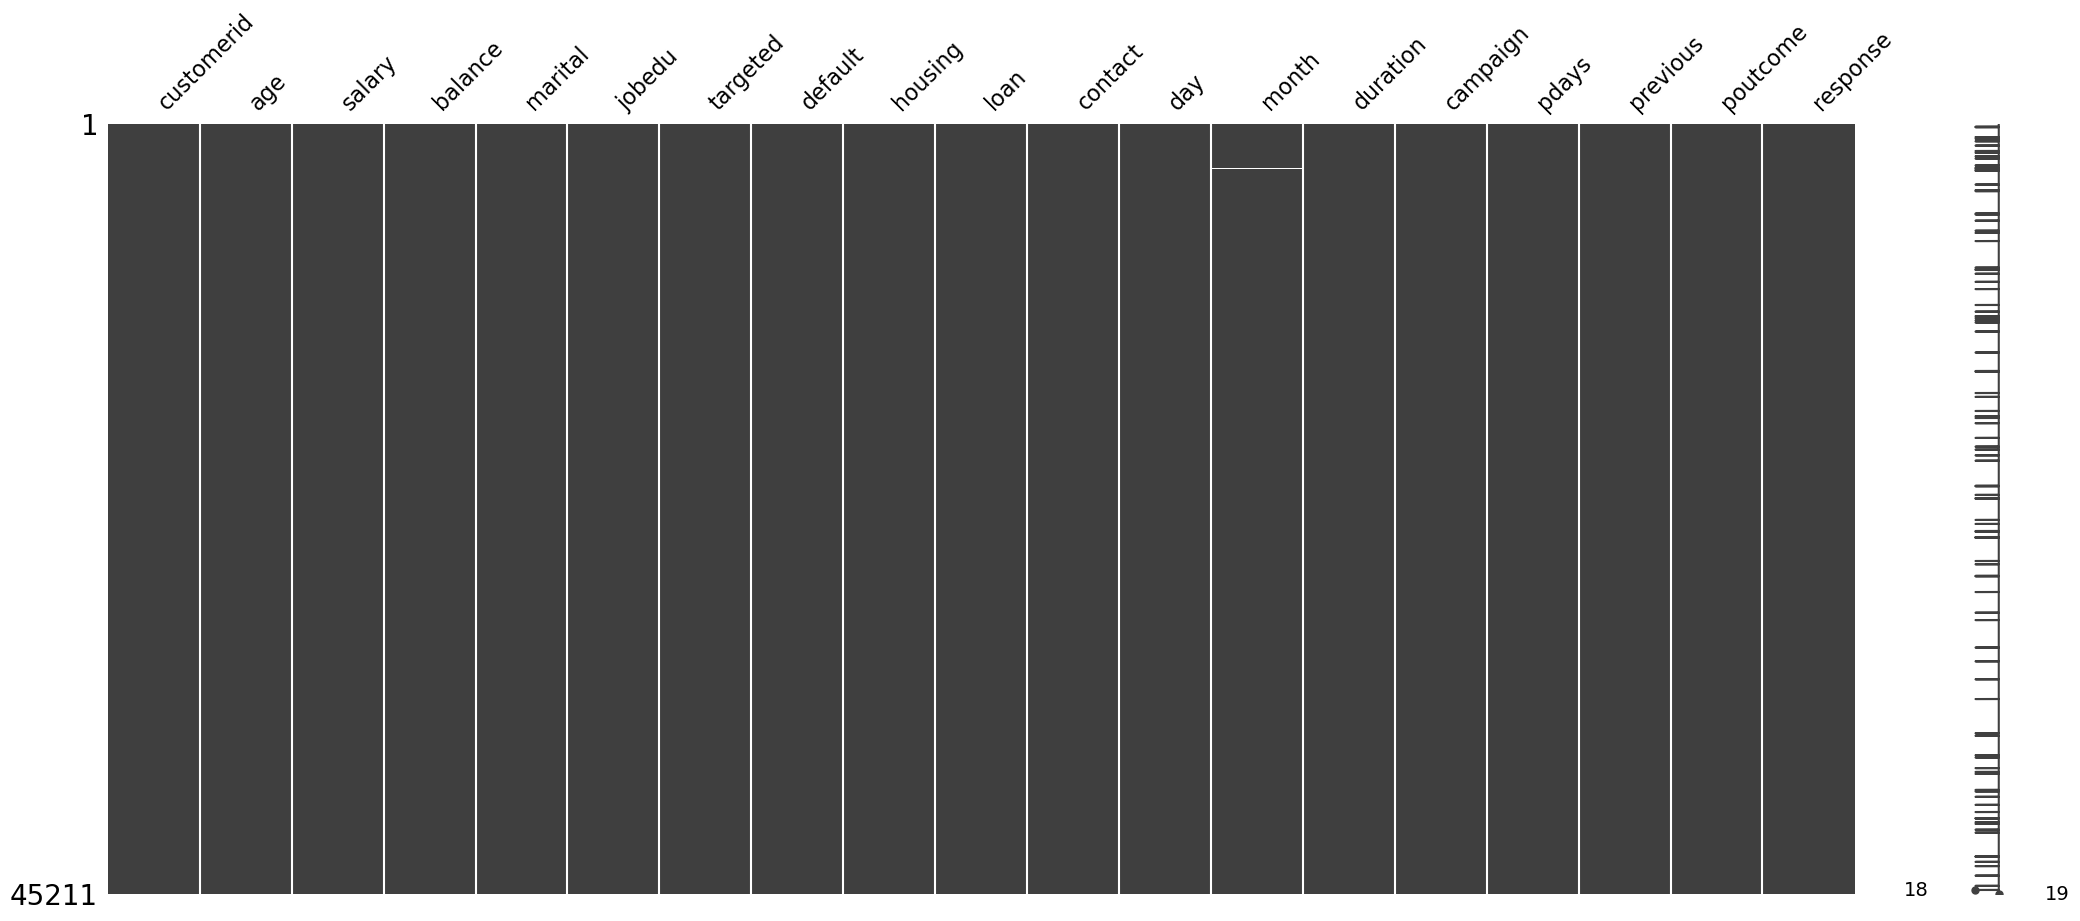

In [7]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)

In [8]:
# Imputing data

df['age'].fillna(df['age'].median(), inplace=True)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df['response'].fillna(df['response'].mode()[0], inplace=True)

In [9]:
# Check duplicates

df.duplicated().sum()

0

In [10]:
# Drop the 'customerid','default','pdays','previous' as it is of no use.

df.drop(['customerid','default','pdays','previous'],axis=1,inplace=True)

In [11]:
# Convert the age variable data type from float to integer.

df['age'] = df['age'].astype(int)

In [12]:
# Splitting 'jobedu' in two columns by using lambda function

# Job column
df['job'] = df['jobedu'].apply(lambda x: x.split(',')[0])

# Education column
df['education'] = df['jobedu'].apply(lambda x: x.split(',')[1])

# Drop the 'jobedu' column
df.drop('jobedu', axis = 1, inplace = True)

In [13]:
# Splitting 'month' in two columns by using lambda function

# Month column
df['months'] = df['month'].apply(lambda x: x.split(',')[0])

# Year column
df['year'] = df['month'].apply(lambda x: int(x.split(',')[1]))

# Drop the 'month' column
df.drop('month', axis = 1, inplace = True)

In [14]:
# Convert the 'duration' column to minutes

df['duration'] = df['duration'].apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int32  
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   housing    45211 non-null  object 
 6   loan       45211 non-null  object 
 7   contact    45211 non-null  object 
 8   day        45211 non-null  int64  
 9   duration   45211 non-null  float64
 10  campaign   45211 non-null  int64  
 11  poutcome   45211 non-null  object 
 12  response   45211 non-null  object 
 13  job        45211 non-null  object 
 14  education  45211 non-null  object 
 15  months     45211 non-null  object 
 16  year       45211 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(10)
memory usage: 5.7+ MB


age  salary  balance  marital targeted housing loan  contact  day  \
0   58  100000     2143  married      yes     yes   no  unknown    5   
1   44   60000       29   single      yes     yes   no  unknown    5   
2   33  120000        2  married      yes     yes  yes  unknown    5   
3   47   20000     1506  married       no     yes   no  unknown    5   
4   33       0        1   single       no      no   no  unknown    5   

   duration  campaign poutcome response           job  education months  year  
0  4.350000         1  unknown       no    management   tertiary    may  2017  
1  2.516667         1  unknown       no    technician  secondary    may  2017  
2  1.266667         1  unknown       no  entrepreneur  secondary    may  2017  
3  1.533333         1  unknown       no   blue-collar    unknown    may  2017  
4  3.300000         1  unknown       no       unknown    unknown    may  2017

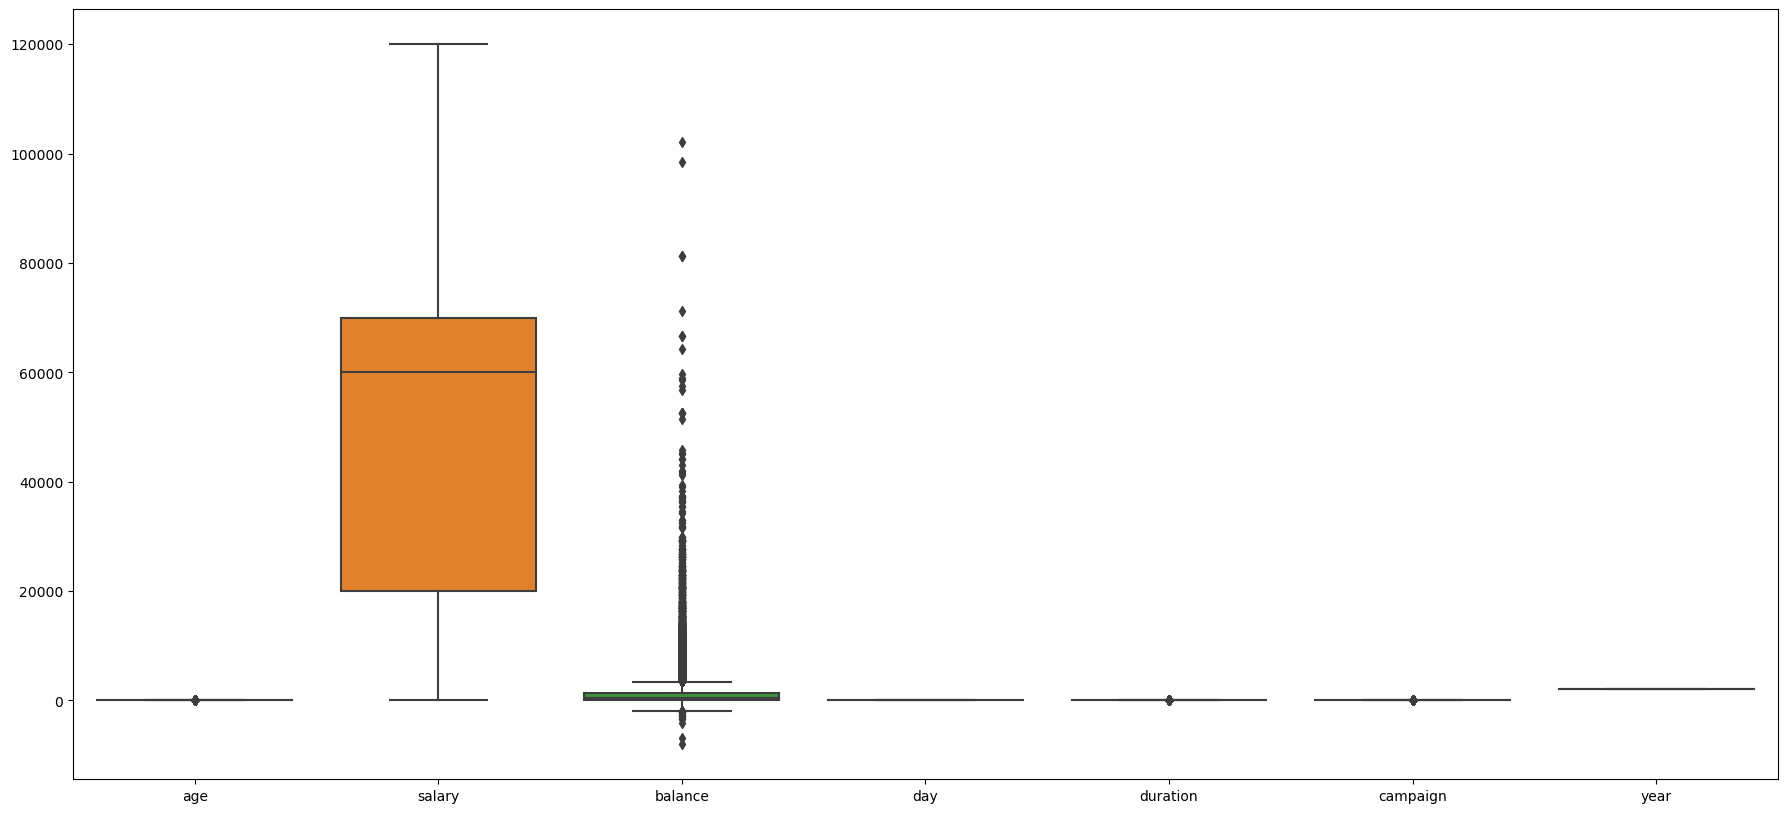

In [16]:
# Check in outlier data set

plt.figure(figsize=(22,10))

sns.boxplot(df)

plt.show()

In [17]:
# Extract only numberic data types & Check skewness in data set

x = df.select_dtypes(include = ['number'])
x.skew()

age         0.685377
salary      0.137829
balance     8.360308
day         0.093079
duration    3.144318
campaign    4.898650
year        0.000000
dtype: float64

## Check relationships between variables by different charts

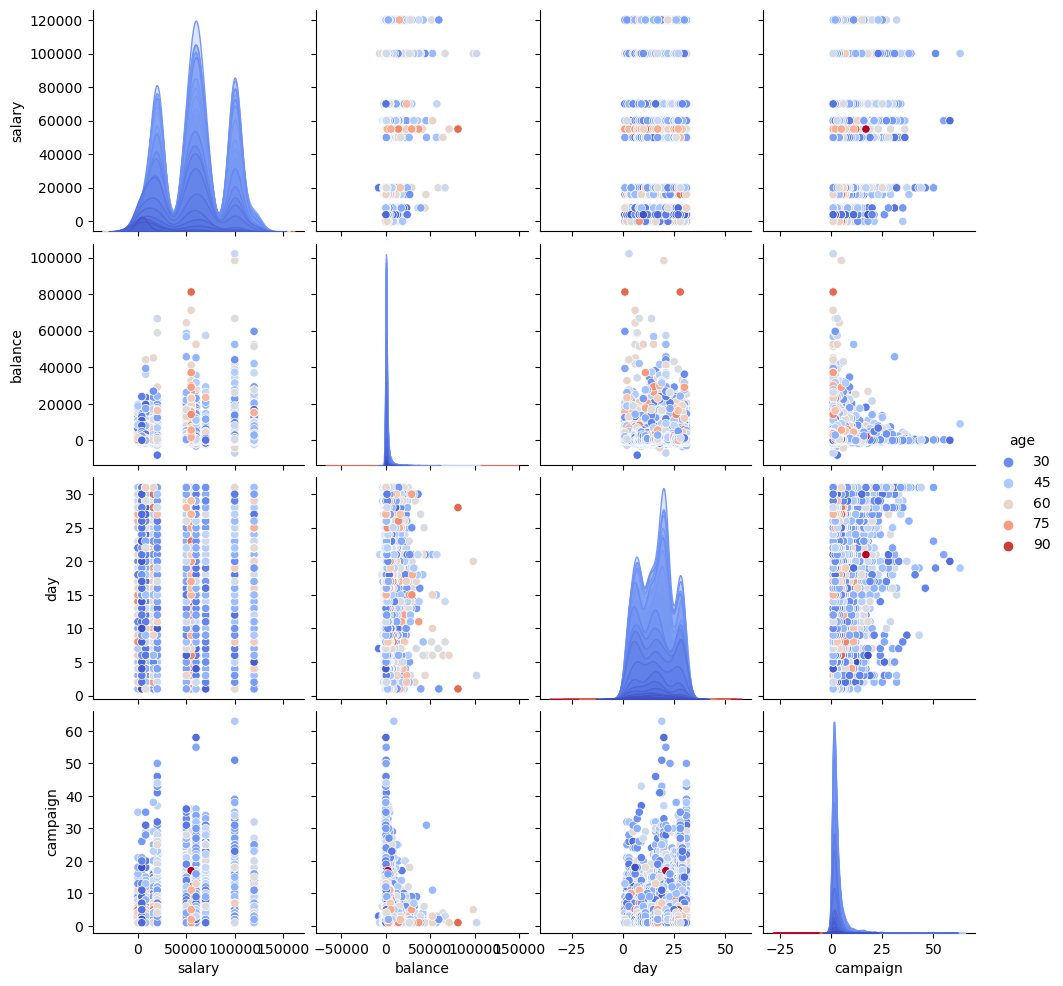

In [18]:
# Pairplot to visualize relationships between variables

sns.pairplot(x[['age', 'salary', 'balance','day','campaign']],
             hue='age', palette='coolwarm', diag_kind='kde')

In [19]:
# Correlation matrix

corr_matrix = x[['age', 'salary', 'balance','day','campaign']].corr()
corr_matrix 

age    salary   balance       day  campaign
age       1.000000  0.024366  0.097753 -0.009185  0.004851
salary    0.024366  1.000000  0.055469  0.027864  0.015005
balance   0.097753  0.055469  1.000000  0.004503 -0.014578
day      -0.009185  0.027864  0.004503  1.000000  0.162490
campaign  0.004851  0.015005 -0.014578  0.162490  1.000000

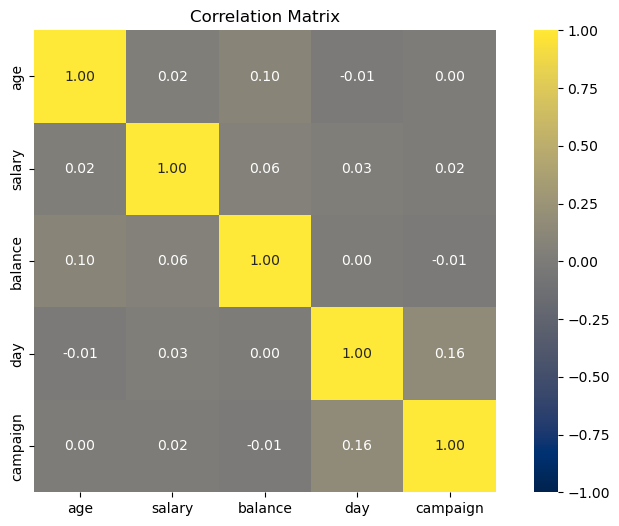

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', square=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Extract only Object data types

y = df.select_dtypes(include = ['object'])
y.describe().T

count unique          top   freq
marital    45211      3      married  27214
targeted   45211      2          yes  37091
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
poutcome   45211      4      unknown  36959
response   45211      2           no  39924
job        45211     12  blue-collar   9732
education  45211      4    secondary  23202
months     45211     12          may  13797

## Interpretation: Understanding the Dataset

- Loading the Dataset: Use pd.read_csv with the skiprows parameter to skip the unnecessary headers.
- Examining Structure: Utilize shape, columns, head() and info() methods to get insights into the dataset’s structure, columns, and data types.
- Missing Values: Employ isnull().sum()  & msno.matrix() to identify & visualize any columns with missing data.
- Imputing data: Employ fillna() with median() & mode() to fill the missing values.
- Data Duplicates: duplicated().sum() helps in detecting duplicate rows.
- Drop Columns: Drop the 'customerid','default','pdays','previous' as it is of no use.
- Convert the Data Type: Use the astype method to convert the age column from float to integer.
- Split columns to get more data: Apply method with a lambda function to split the jobedu column into new columns job and education & same as with month column into new columns months and year & duration column is in seconds and minutes, divide it by 60 to convert it to minutes.
- Outliers: The boxplot shows outliers mainly in the "balance" variable, with a few in "age" , "duration" and  "campaign". The "salary" variable does not have outliers, while "day," and "year" have none visible beyond the whiskers.
- Check Skewness: The skewness values indicate that 'age' and 'duration' are moderately right-skewed, 'salary', 'day', and 'year' are approximately symmetric, while 'balance' and 'campaign' are highly right-skewed.
- Visualize Relationships: The pairplot indicates that there are no strong linear relationships among the variables (age, salary, balance, day, campaign). Salary displays a multimodal distribution, while balance and campaign are right-skewed.
- Correlation Analysis: The analysis reveals significant correlations between Age and Balance, and Balance and Duration. Older individuals tend to have higher balances, and higher balances are associated with longer durations. These insights can inform targeted marketing strategies.
- Describe Object Columns: Use the describe method to get summary statistics for the object columns.

## 2. Descriptive Statistics
a. Derive summary statistics (mean, median, standard deviation) for relevant columns.

b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

## Calculate Summary Statistics

In [22]:
df.describe().T

count          mean           std     min           25%      50%  \
age       45211.0     40.934795     10.616926    18.0     33.000000     39.0   
salary    45211.0  57006.171065  32085.718415     0.0  20000.000000  60000.0   
balance   45211.0   1362.272058   3044.765829 -8019.0     72.000000    448.0   
day       45211.0     15.806419      8.322476     1.0      8.000000     16.0   
duration  45211.0      4.302718      4.292130     0.0      1.716667      3.0   
campaign  45211.0      2.763841      3.098021     1.0      1.000000      2.0   
year      45211.0   2017.000000      0.000000  2017.0   2017.000000   2017.0   

                   75%            max  
age          48.000000      95.000000  
salary    70000.000000  120000.000000  
balance    1428.000000  102127.000000  
day          21.000000      31.000000  
duration      5.316667      81.966667  
campaign      3.000000      63.000000  
year       2017.000000    2017.000000

## Examine Target Variable Distribution

response
no     39924
yes     5287
Name: count, dtype: int64


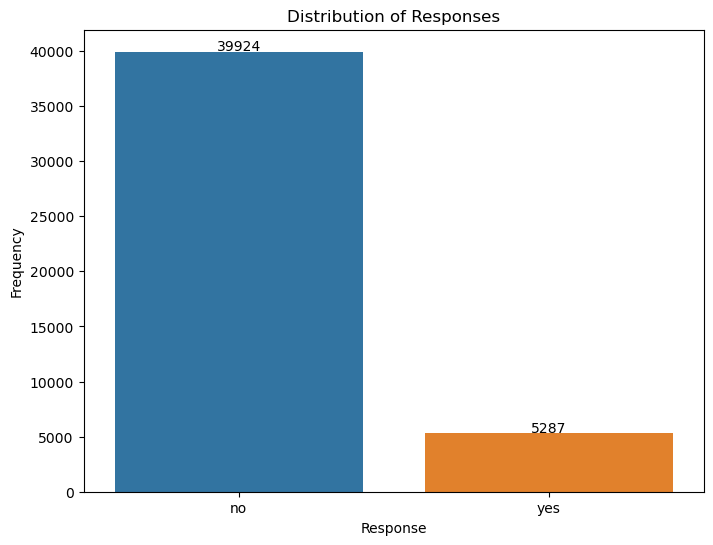

In [23]:
# Count the frequency of each response

response_counts = df['response'].value_counts()
print(response_counts)

# Plot a bar chart

plt.figure(figsize=(8,6))
sns.barplot(x=response_counts.index, y=response_counts.values)
for i, value in enumerate(response_counts.values):
    plt.text(i, value + 100, str(value), ha='center')
plt.title('Distribution of Responses')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

campaign
1    0.145919
2    0.112035
3    0.111936
4    0.089722
5    0.078798
Name: response, dtype: float64


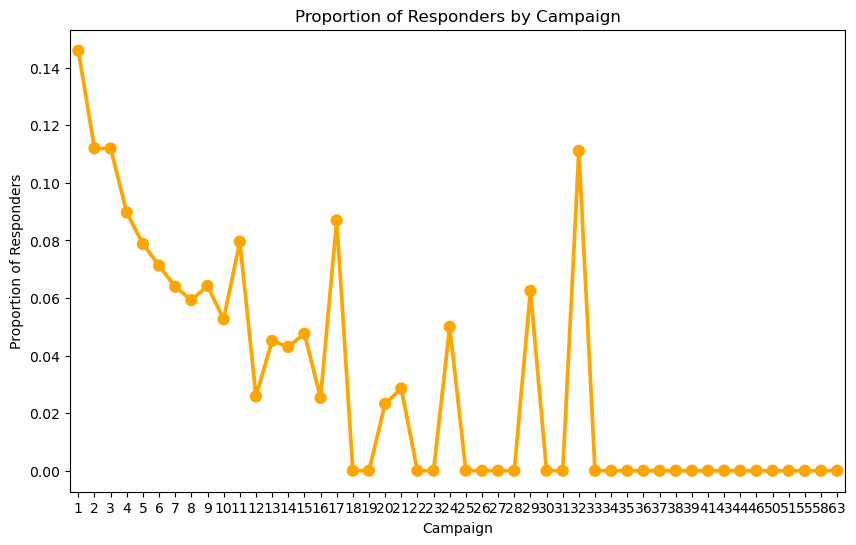

In [24]:
# Group by 'campaign' and calculate the proportion of responders

campaign_response_prop = df.groupby('campaign')['response'].apply(lambda x: x[x == 'yes'].count() / x.count())
print(campaign_response_prop.head())

# Plot the proportions of Responders by Campaign
plt.figure(figsize=(10,6))
sns.pointplot(x=campaign_response_prop.index, y=campaign_response_prop.values, color='orange')
plt.xlabel('Campaign')
plt.ylabel('Proportion of Responders')
plt.title('Proportion of Responders by Campaign')
plt.show()

## Interpretation: Descriptive Statistics

#### Calculate Summary Statistics: 
Use the describe method to get summary statistics like mean, median, and standard deviation.

#### Examine Target Variable Distribution: 
Using value_counts and visualize with sns.barplot. Calculate the proportion of responders by campaign using groupby and plot with sns.pointplot. This analysis reveals insights into response frequencies and campaign effectiveness

## 3. Univariate Analysis
a. Examine the distribution of individual key features, such as age, balance, and call duration.

b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

## Feature Distribution Examination & Visual Aids

## Age Distribution

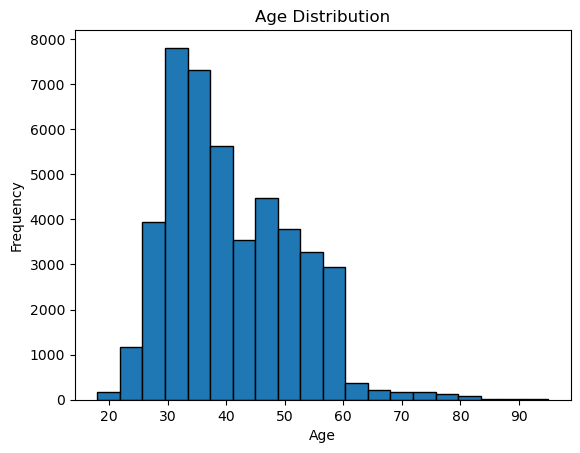

In [25]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

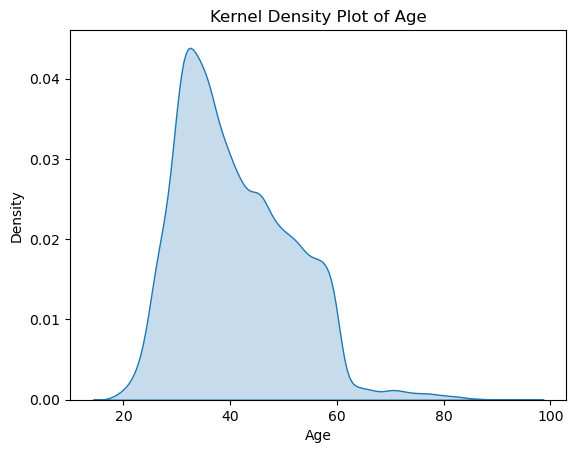

In [26]:
sns.kdeplot(df['age'], shade=True)
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

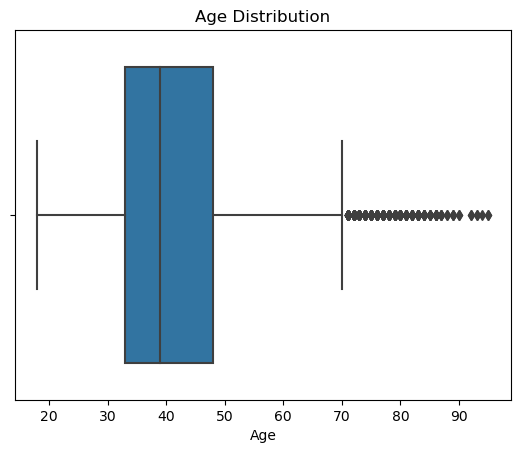

0.00    18.0
0.25    33.0
0.50    39.0
0.75    48.0
1.00    95.0
Name: age, dtype: float64

In [27]:
sns.boxplot(x=df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

#print the quantile (0, 0.25, 0.50, 0.75 and 1.0) of age variable
 
df.age.quantile([0, 0.25, 0.50, 0.75,1.0])

## Balance Distribution

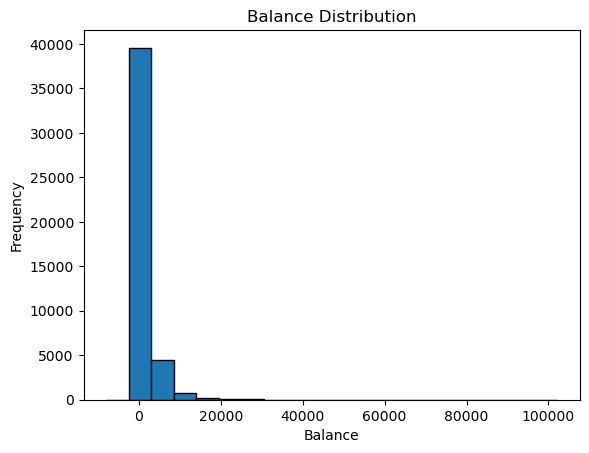

In [28]:
plt.hist(df['balance'], bins=20, edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

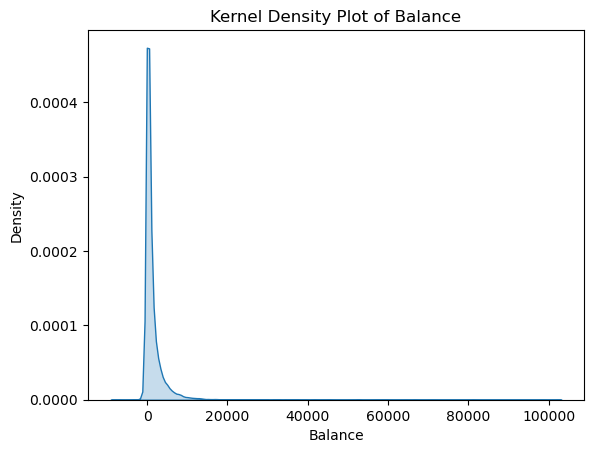

In [29]:
sns.kdeplot(df['balance'], shade=True)
plt.title('Kernel Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

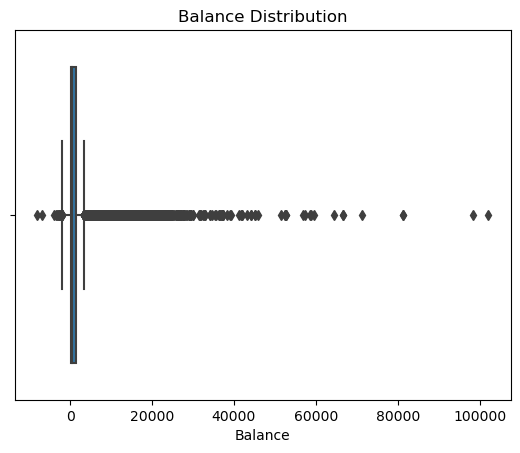

0.00     -8019.0
0.25        72.0
0.50       448.0
0.75      1428.0
1.00    102127.0
Name: balance, dtype: float64

In [30]:
sns.boxplot(x=df['balance'])
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.show()

#print the quantile (0, 0.25, 0.50, 0.75 and 1.0) of balance variable
 
df.balance.quantile([0, 0.25, 0.50, 0.75,1.0])

## Call Duration Distribution

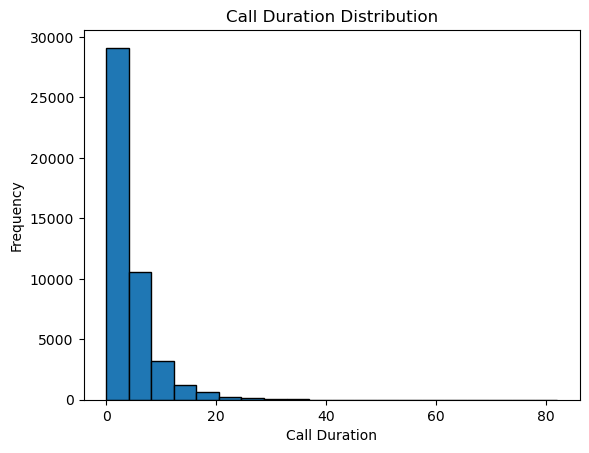

In [31]:
plt.hist(df['duration'], bins=20, edgecolor='black')
plt.title('Call Duration Distribution')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.show()

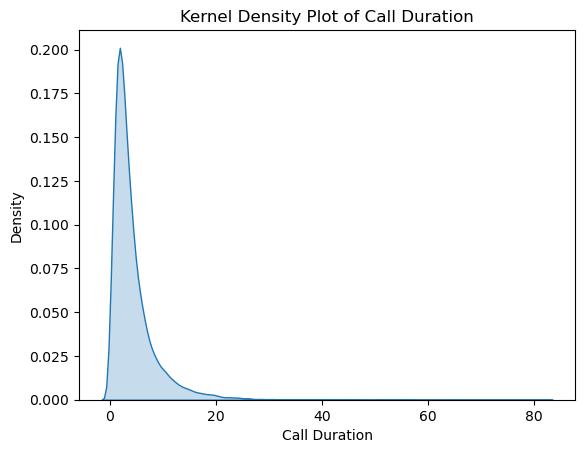

In [32]:
sns.kdeplot(df['duration'], shade=True)
plt.title('Kernel Density Plot of Call Duration')
plt.xlabel('Call Duration')
plt.ylabel('Density')
plt.show()

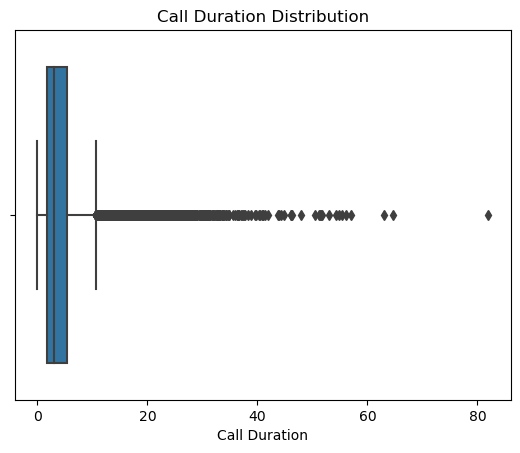

0.00     0.000000
0.25     1.716667
0.50     3.000000
0.75     5.316667
1.00    81.966667
Name: duration, dtype: float64

In [33]:
sns.boxplot(x=df['duration'])
plt.title('Call Duration Distribution')
plt.xlabel('Call Duration')
plt.show()

#print the quantile (0, 0.25, 0.50, 0.75 and 1.0) of balance variable
 
df.duration.quantile([0, 0.25, 0.50, 0.75,1.0])

## Salary Distribution

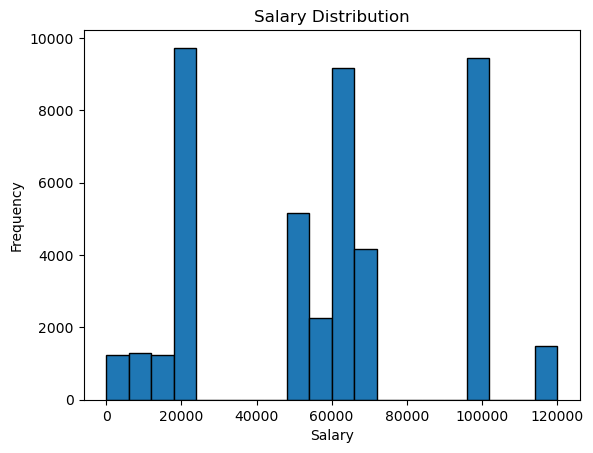

In [34]:
plt.hist(df['salary'], bins=20, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

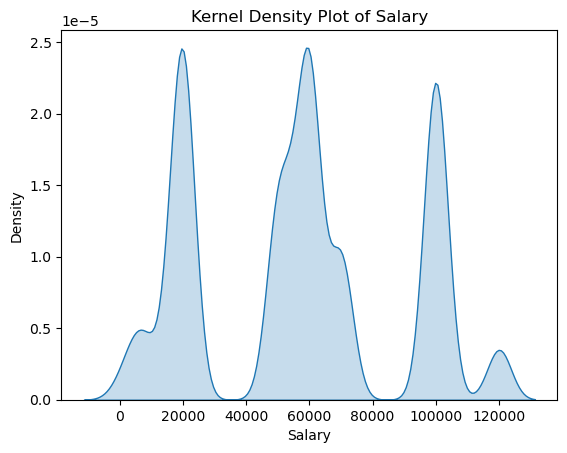

In [35]:
sns.kdeplot(df['salary'], shade=True)
plt.title('Kernel Density Plot of Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

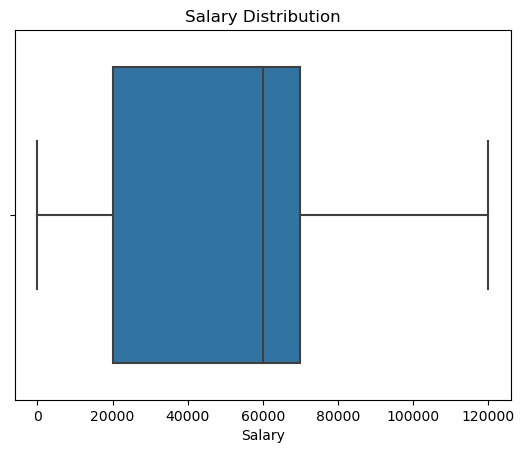

0.00     0.000000
0.25     1.716667
0.50     3.000000
0.75     5.316667
1.00    81.966667
Name: duration, dtype: float64

In [36]:
sns.boxplot(x=df['salary'])
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

#print the quantile (0, 0.25, 0.50, 0.75 and 1.0) of balance variable
 
df.duration.quantile([0, 0.25, 0.50, 0.75,1.0])

## Interpretation: Univariate Analysis



 #### Feature Distribution Examination & Visual Aids: 

##### Age Distribution: 
- Histogram: Right-skewed distribution, indicating most customers are older.
- Kernel Density Plot: Most customers are between 40-50 years old, with a few outliers above 60.
- Box Plot: Median -39, Outliers-above  70, Quartile- Q1= 33, Q3=48, IQR-15.

##### Balance Distribution: 
- Histogram: Left-skewed distribution, indicating most customers have low balances.
- Kernel Density Plot: Peak around 0- 12000, with a few outliers above 12000.
- Box Plot: Median - 448, Outliers-above  15000, Quartile- Q1= 72, Q3= 1428, IQR-1356.

##### Call Duration Distribution: 
- Histogram: Right-skewed distribution, indicating most calls are short.
- Kernel Density Plot: Peak around 0-81 minutes, indicating most calls are brief.
- Box Plot: Median -3, Outliers-above  6, Quartile- Q1=1.71, Q3= 5.31, IQR-3.60.

##### Salary Distribution: 
- Histogram: Bell-shaped distribution, indicating moderate variability.
- Kernel Density Plot: Most customers are between 40- 120000 Salary, with a normal distribution.
- Box Plot: Median - 60000, Quartile- Q1= 20000, Q3= 70000, IQR-50000.



## 4. Bivariate Analysis
a. Evaluate the relationship between independent variables and the target variable.

b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.

## Evaluate the Relationship

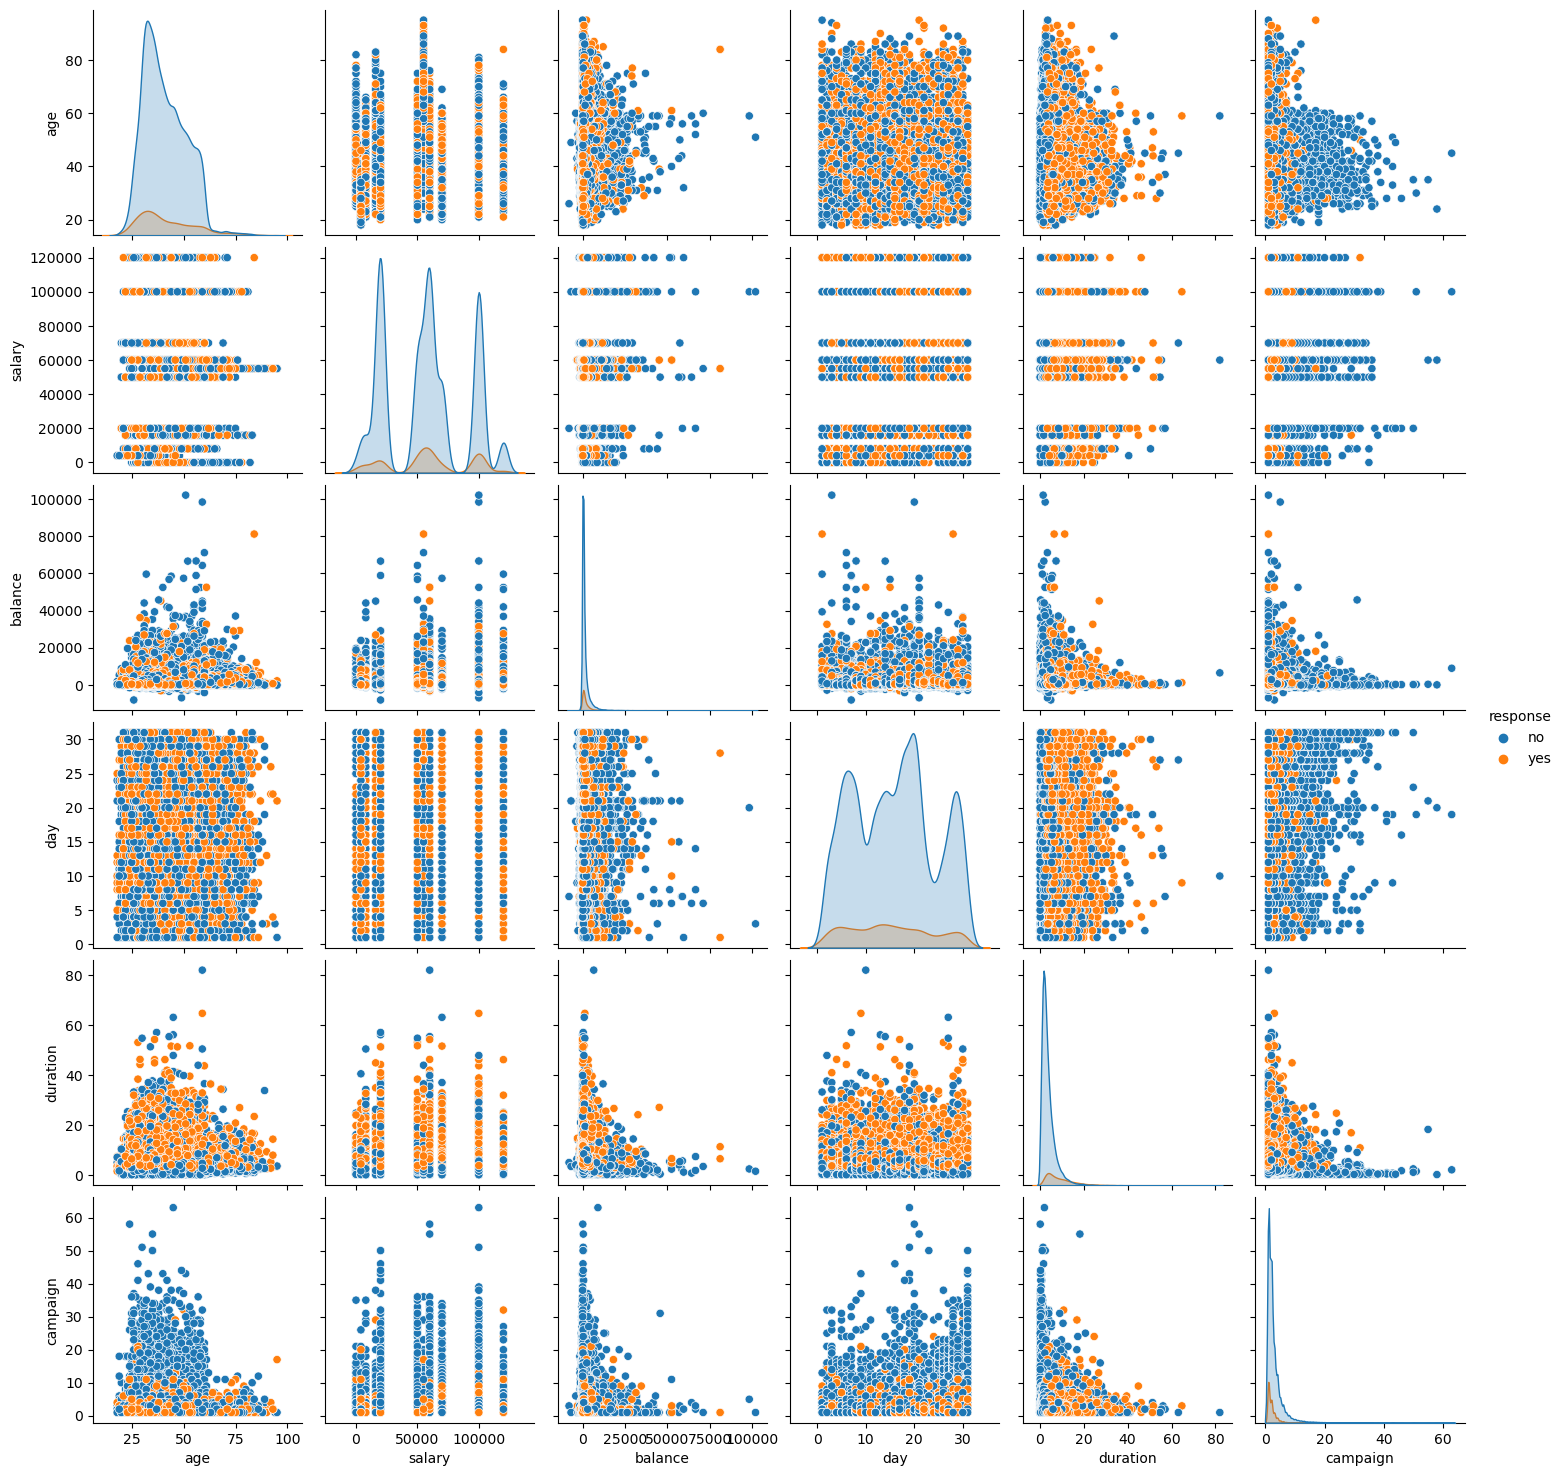

In [37]:
# Define the independent variables
independent = ['age', 'salary', 'balance', 'day', 'duration', 'campaign']

# Define the target variable
target = ['poutcome', 'response', 'education']

# Create a pair plot
sns.pairplot(df[independent + target], hue='response')
plt.show()

## Feature Analysis

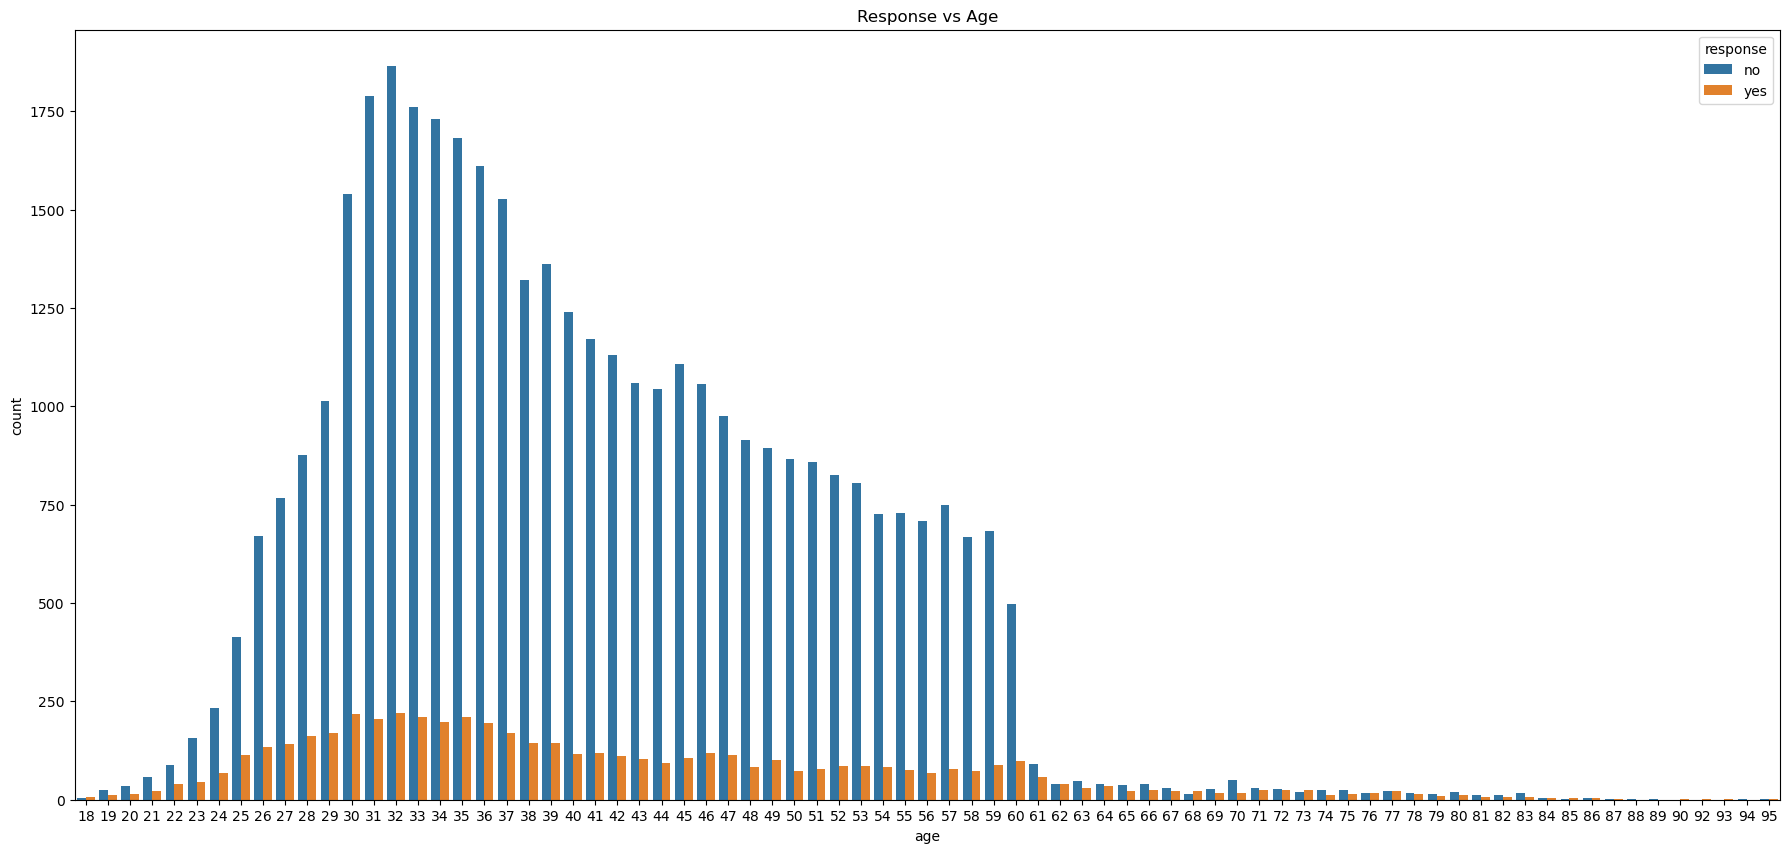

In [38]:
# Visualize the relationship between age and response

plt.figure(figsize=(22, 10))
sns.countplot(x='age', hue='response', data=df)
plt.title('Response vs Age')
plt.show()

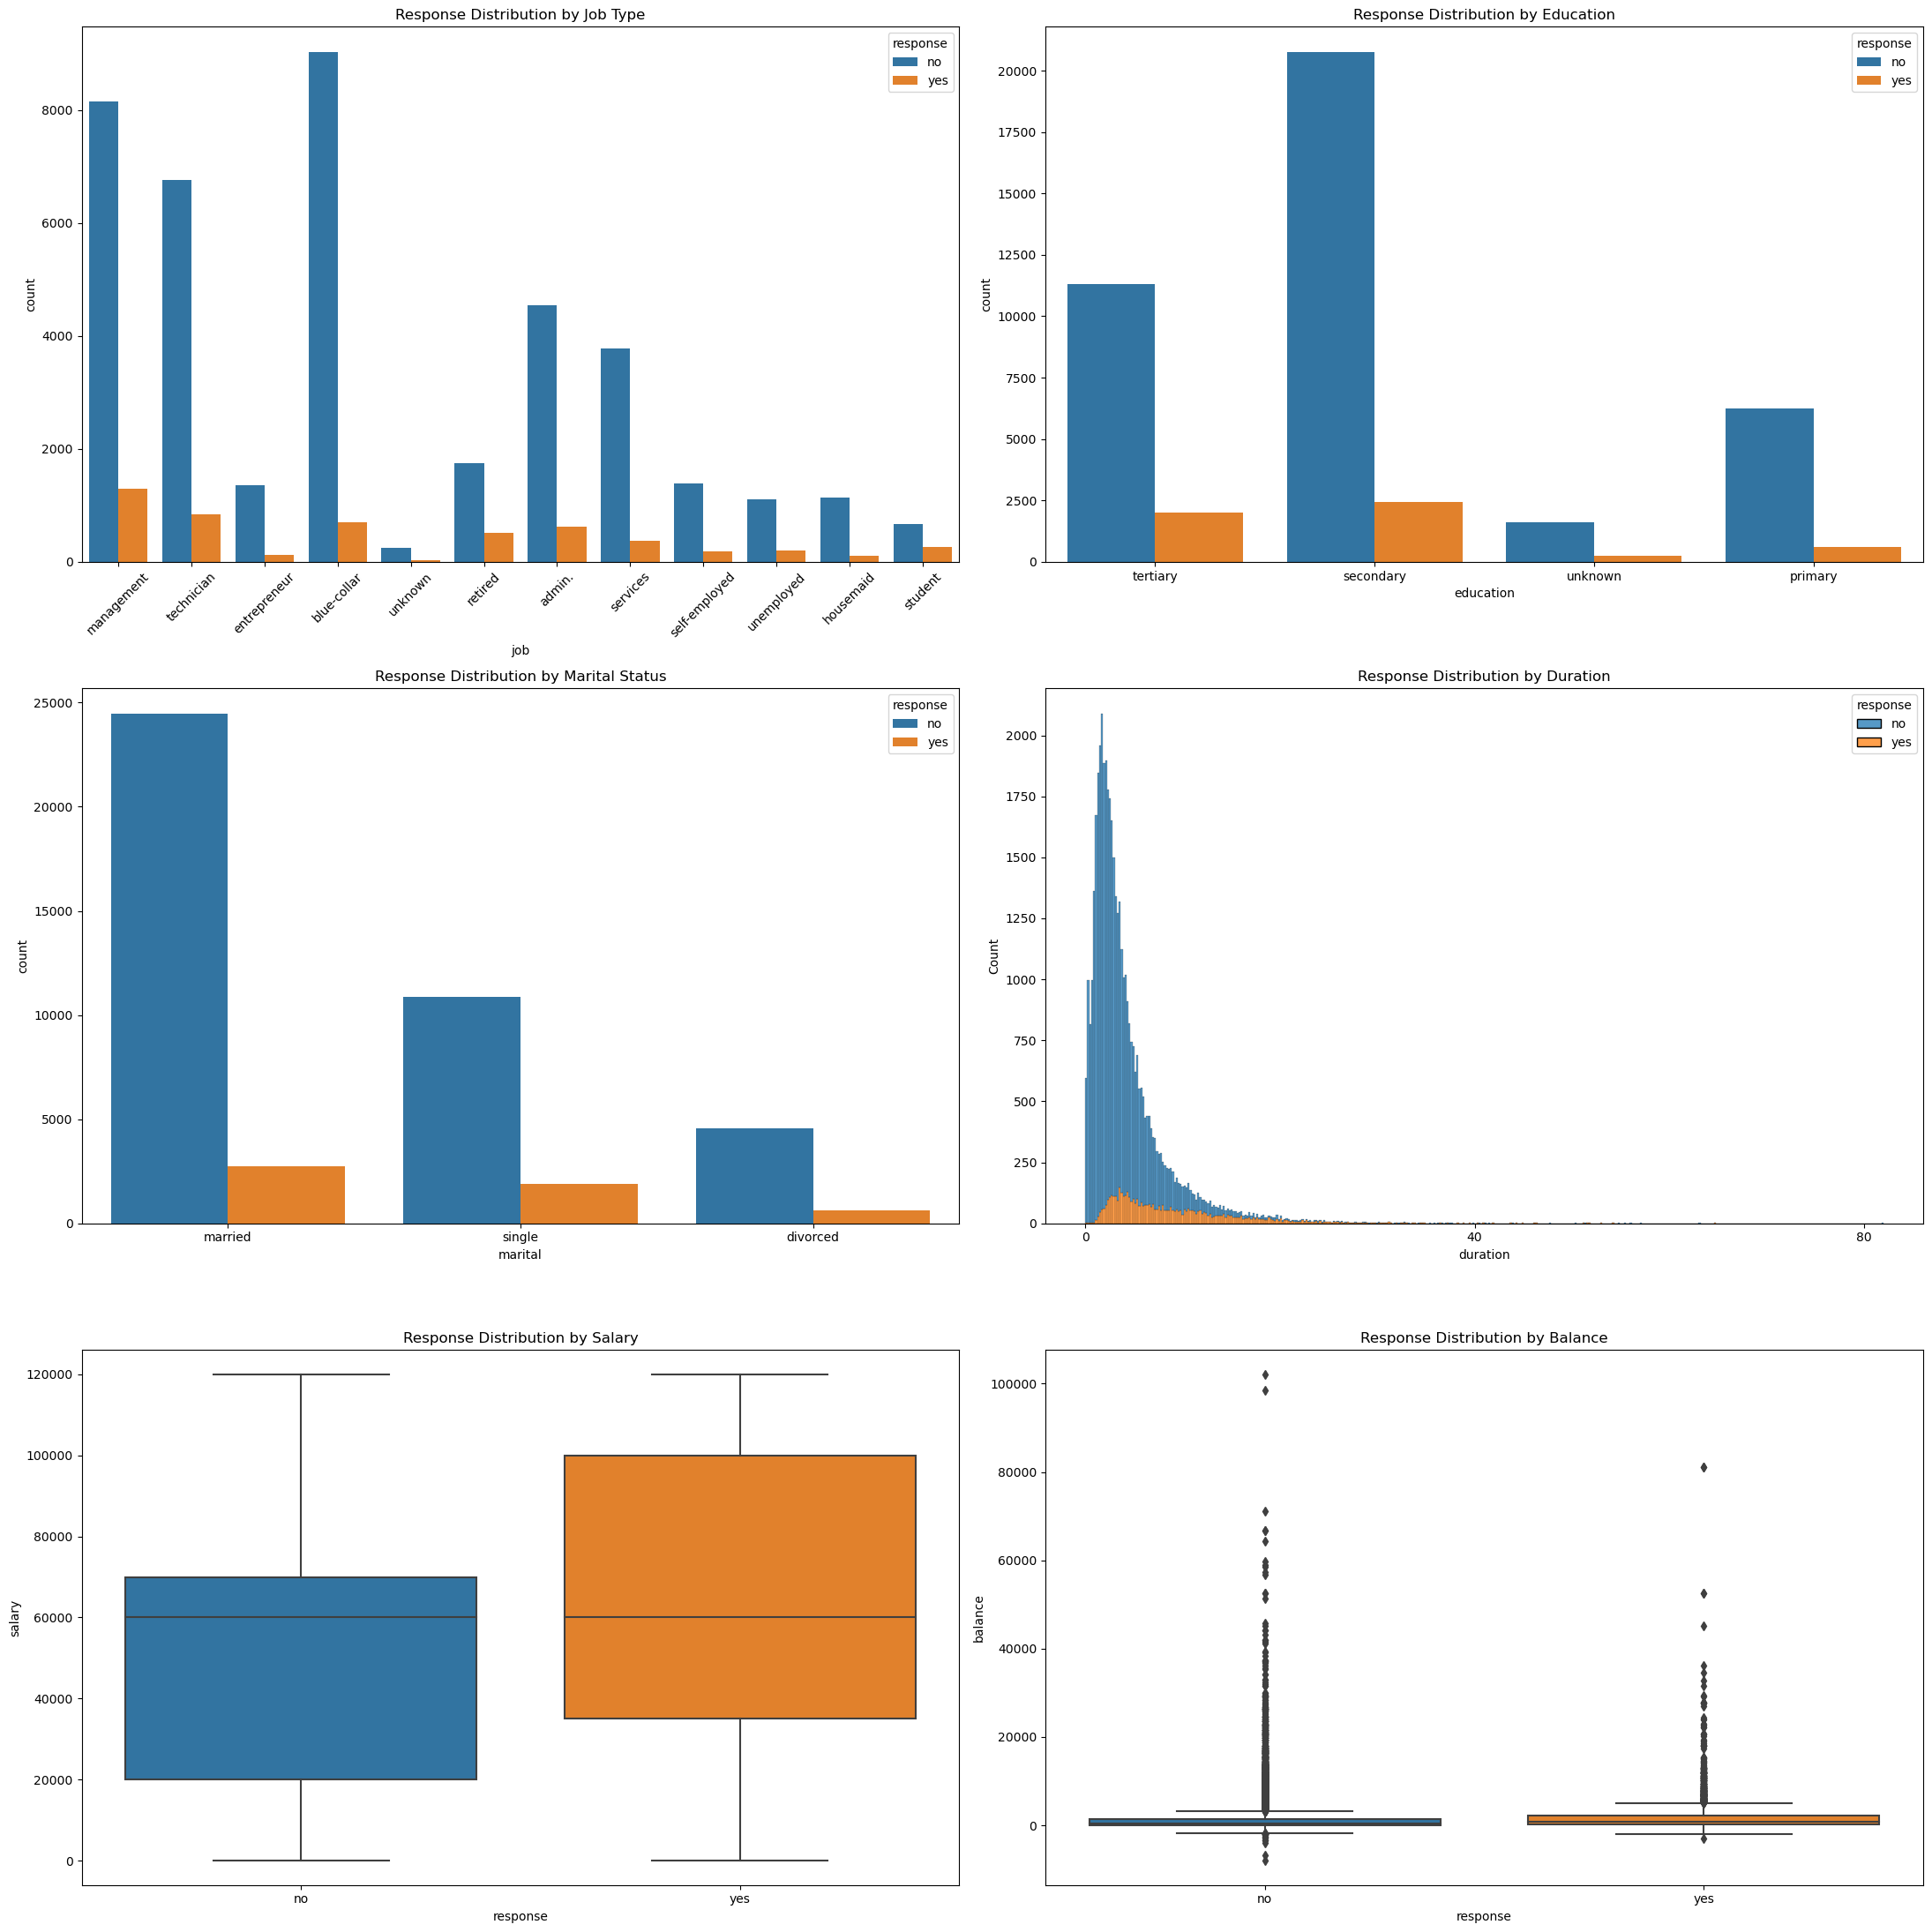

In [39]:
# Create a figure with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(22, 22))

# Visualize the relationship between job type and response
sns.countplot(x='job', hue='response', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Response Distribution by Job Type')
axs[0, 0].tick_params(axis='x', rotation=45)

# Visualize the relationship between education and response
sns.countplot(x='education', hue='response', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Response Distribution by Education')

# Visualize the relationship between marital status and response
sns.countplot(x='marital', hue='response', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Response Distribution by Marital Status')

# Create a stacked bar chart to show the distribution of response by duration
sns.histplot(x='duration', hue='response', data=df, multiple='stack', ax=axs[1, 1])
axs[1, 1].set_title('Response Distribution by Duration')
axs[1, 1].xaxis.set_major_locator(ticker.MultipleLocator(40))

# Visualize the relationship between salary and response
sns.boxplot(x='response', y='salary', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Response Distribution by Salary')

# Visualize the relationship between balance and response
sns.boxplot(x='response', y='balance', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Response Distribution by Balance')

# Layout so plots do not overlap
fig.tight_layout()
plt.show()


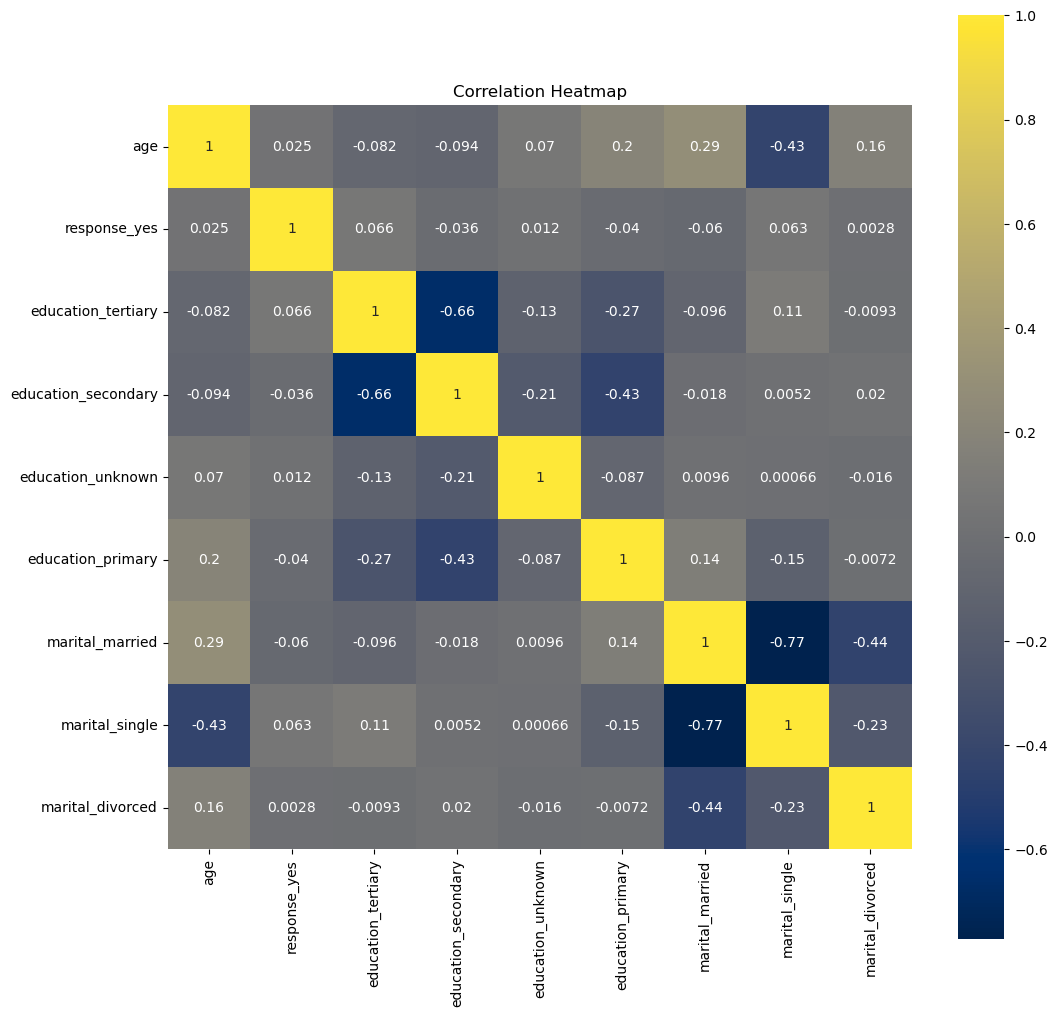

In [40]:
# One-hot encode categorical variables
df_encode = pd.get_dummies(df, columns=['education', 'marital', 'response'])

# Create a heatmap to show the correlation between features
corr_matrix = df_encode[['age', 'response_yes', 'education_tertiary', 'education_secondary','education_unknown', 'education_primary', 'marital_married','marital_single', 'marital_divorced']].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', square=True)
plt.title('Correlation Heatmap')
plt.show()

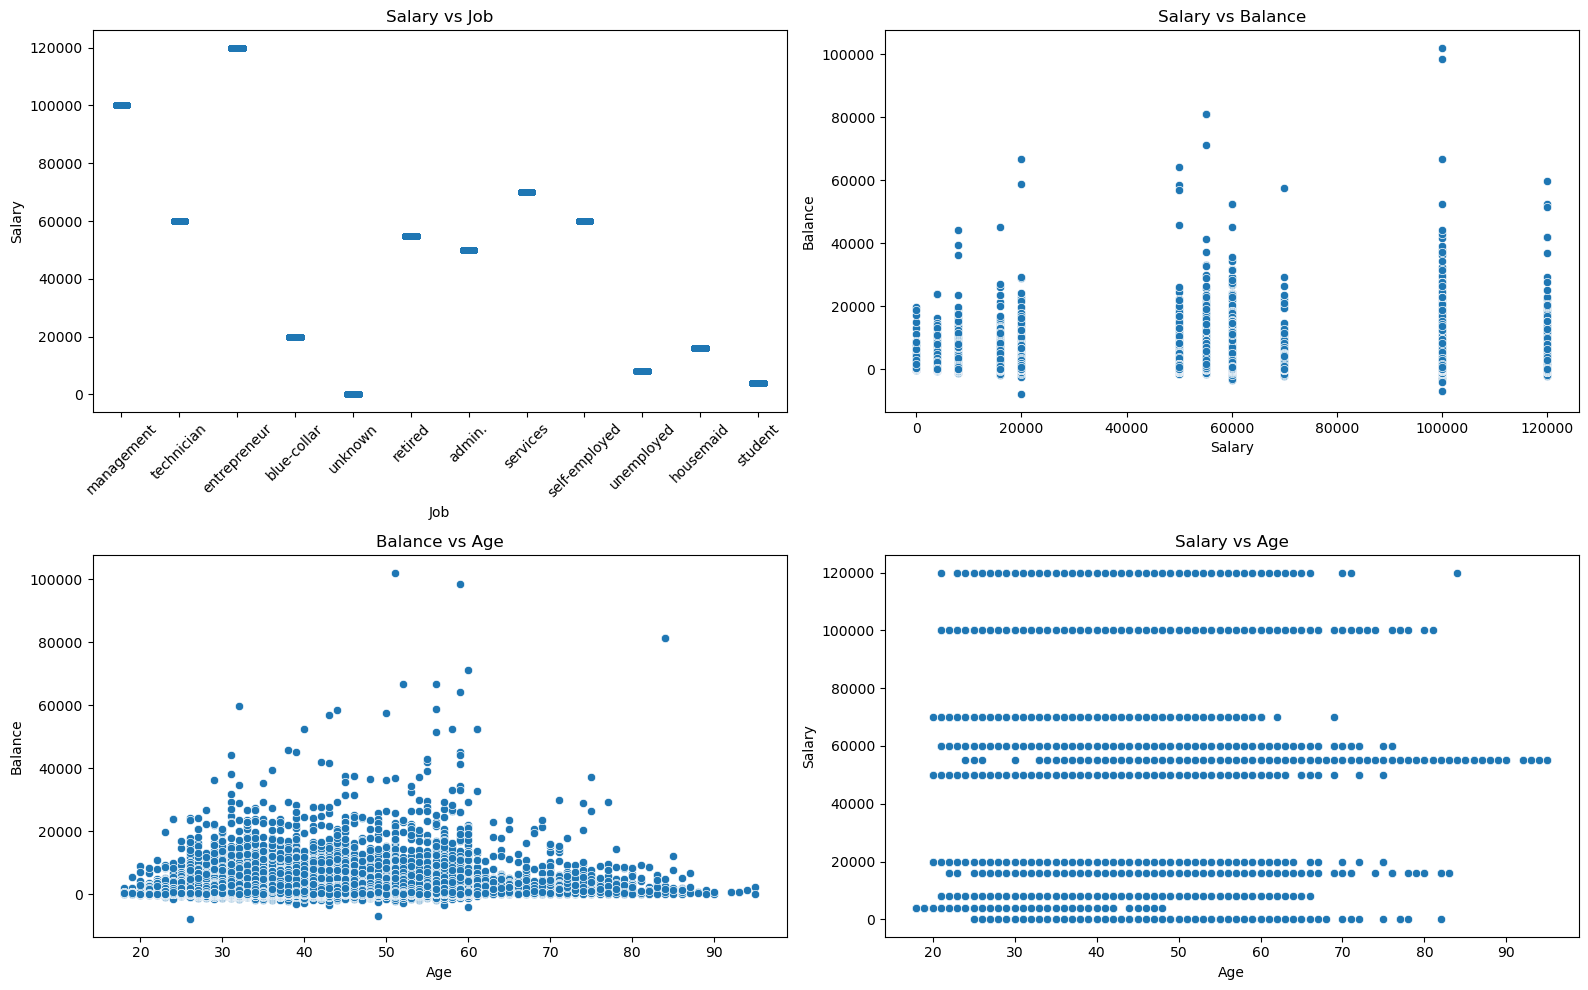

In [41]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plot the relationship between marital status and age
sns.stripplot(x='job', y='salary', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Salary vs Job')
axs[0, 0].set_xlabel('Job')
axs[0, 0].set_ylabel('Salary')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot the relationship between salary and balance
sns.scatterplot(x='salary', y='balance', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Salary vs Balance')
axs[0, 1].set_xlabel('Salary')
axs[0, 1].set_ylabel('Balance')

# Plot the relationship between balance and age
sns.scatterplot(x='age', y='balance', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Balance vs Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Balance')

# Plot the relationship between balance and age
sns.scatterplot(x='age', y='salary', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Salary vs Age')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Salary')

# Layout so plots do not overlap
fig.tight_layout()
plt.show()


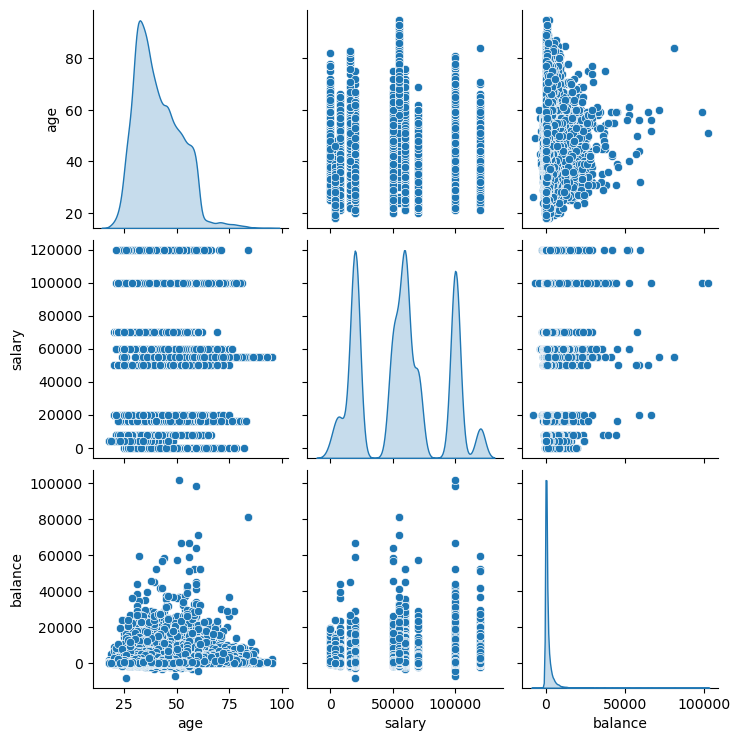


            salary   balance       age
salary   1.000000  0.055469  0.024366
balance  0.055469  1.000000  0.097753
age      0.024366  0.097753  1.000000


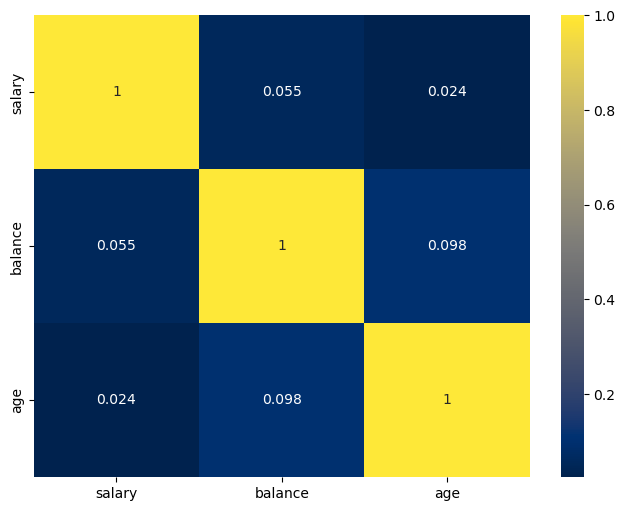

In [42]:
# Create a pair plot  of age, salary and balance
sns.pairplot(df[['age','salary','balance']], diag_kind='kde')
plt.show()

# Calculate the correlation matrix of age, salary and balance
corr_matrix = df[['salary', 'balance', 'age']].corr()
print('\n',corr_matrix)

# Create a heatmap of age, salary and balance
plt.figure(figsize=(8, 6))
sns.heatmap(df[['salary', 'balance', 'age']].corr(), annot=True, cmap='cividis')
plt.show()

## Interpretation: Bivariate Analysis

#### Evaluate the Relationship: 
Choose the independent and target variables to analyze. Using seaborn's pairplot, we analyzed the relationships between independent variables (Age, Salary, Balance, Day, Duration, Campaign) and target variables (Poutcome, Response, Education).

Key findings include:
- Age and salary impact poutcome and response rates
- Balance and campaign influence education levels
- Day and duration have slight effects on poutcome and response rates

#### Feature Analysis:

- Count Plots: Show the count of each category in the independent variables, split by the 'response' variable.

- Stacked Histogram: Shows the distribution of 'duration' categories, stacked by the 'response' variable.

- Box Plots: Show the distribution of 'salary' and 'balance' grouped by the 'response' variable, including the median, interquartile range (IQR), and potential outliers.
- Heatmap: Shows the correlation between different features. The color intensity represents the strength of the correlation, with grey indicating positive correlation and blue indicating negative correlation.
- Strip Plot: A clear variation in salary across different job types, with certain roles commanding higher salaries, highlighting potential disparities and informing for fair compensation and talent retention.
- Scatter Plots: Show the relationship between pairs of numerical variables, helping to identify trends and patterns.
- Pair Plot: Shows the relationships between 'age', 'salary', and 'balance' using scatter plots and KDEs.
- Correlation Matrix: Provides the correlation coefficients between the variables.
- Heatmap: Visualizes the correlation matrix, with color intensity representing the strength and direction of the correlation.

## 5. Categorical Variables Analysis
a. Investigate the distribution of categorical variables such as job type, education, and marital status.

b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

## Investigate the Distribution of Categorical Variables

## Job Type

Unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Frequency count: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Statistics summary: count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object


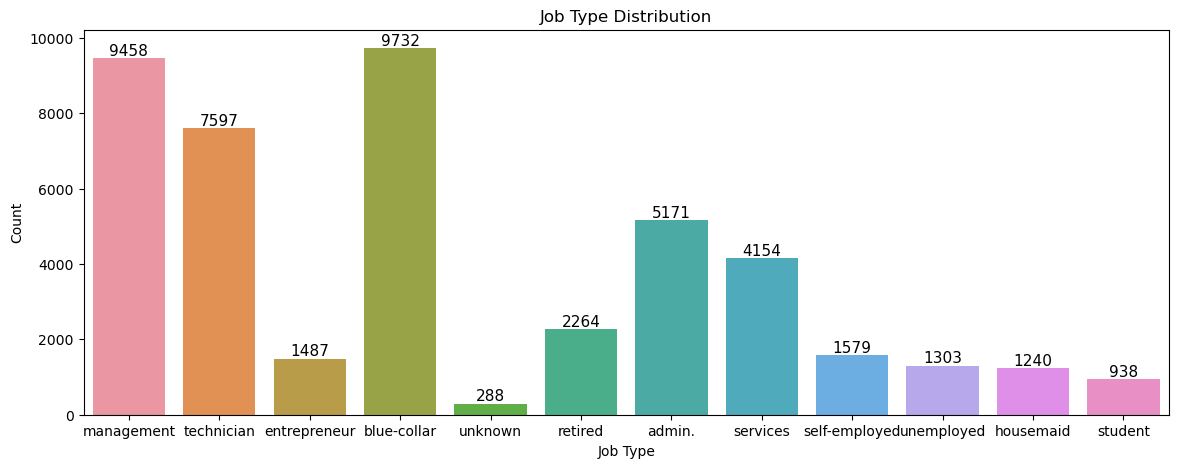

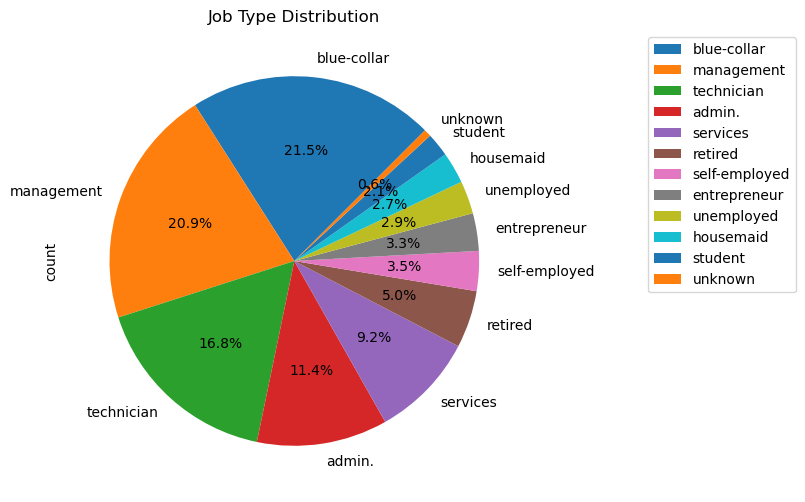

In [43]:
print("Unique values:", df['job'].unique())
print("\nFrequency count:", df['job'].value_counts())
print("\nStatistics summary:", df['job'].describe().T)

# Count Plot
plt.figure(figsize=(14,5))
sns.countplot(x='job', data=df)
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Pie Chart
plt.figure(figsize=(7,6))
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.title('Job Type Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

## Education

Unique values: ['tertiary' 'secondary' 'unknown' 'primary']

Frequency count: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Statistics summary: count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object


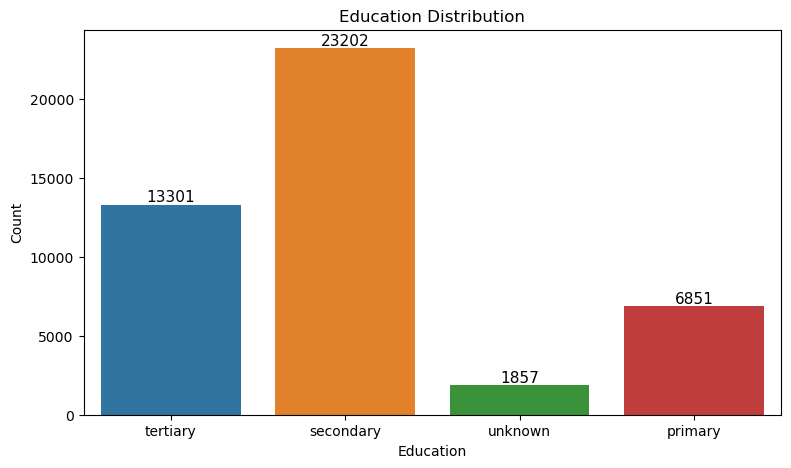

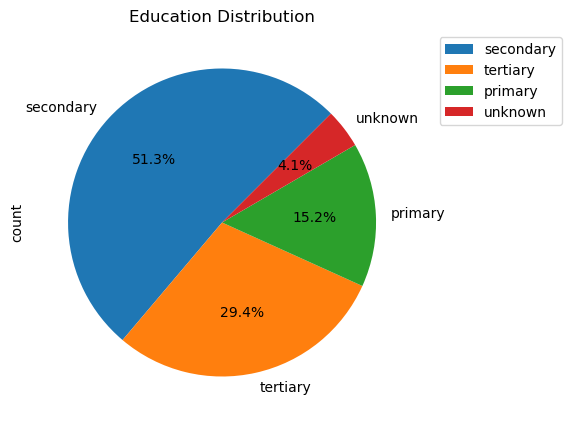

In [44]:
print("Unique values:", df['education'].unique())
print("\nFrequency count:", df['education'].value_counts())
print("\nStatistics summary:", df['education'].describe().T)

# Count Plot
plt.figure(figsize=(9,5))
sns.countplot(x='education', data=df)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Pie Chart
plt.figure(figsize=(5,5))
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.title('Education Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

## Marital Status

Unique values: ['married' 'single' 'divorced']

Frequency count: marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Statistics summary: count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object


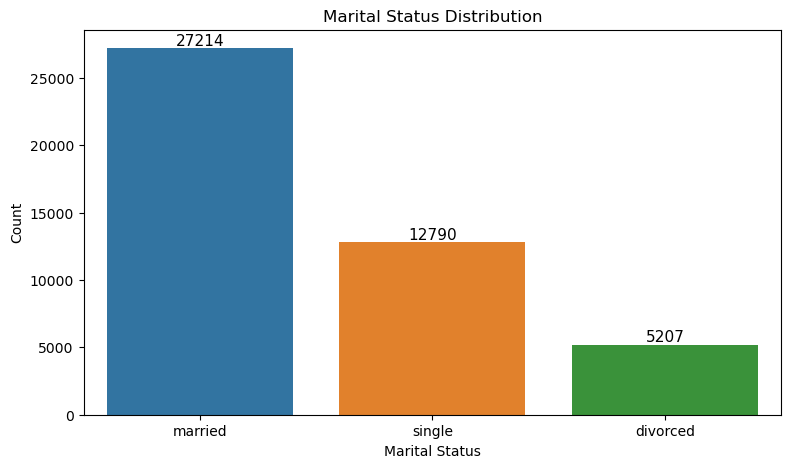

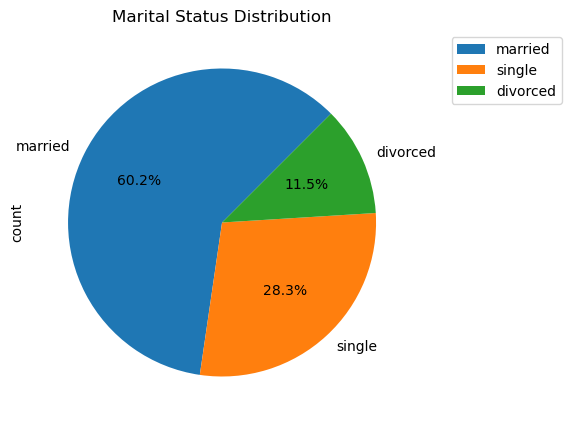

In [45]:
print("Unique values:", df['marital'].unique())
print("\nFrequency count:", df['marital'].value_counts())
print("\nStatistics summary:", df['marital'].describe().T)

# Count Plot
plt.figure(figsize=(9,5))
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Pie Chart
plt.figure(figsize=(5,5))
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.title('Marital Status Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

## Poutcome

Unique values: ['unknown' 'failure' 'other' 'success']

Frequency count: poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

Statistics summary: count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object


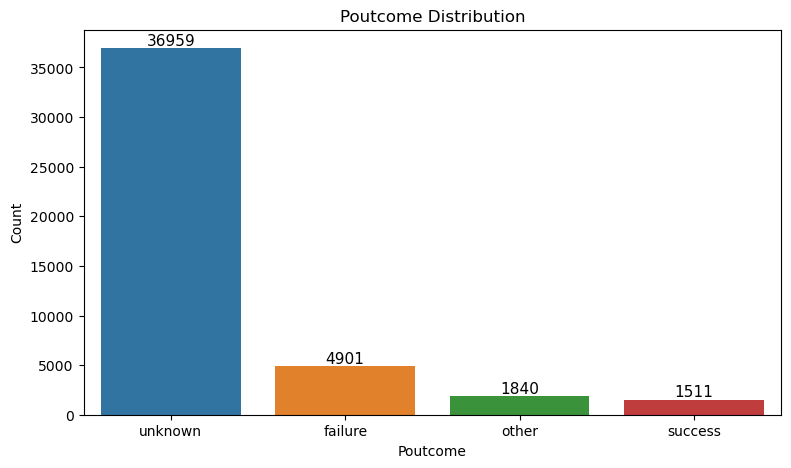

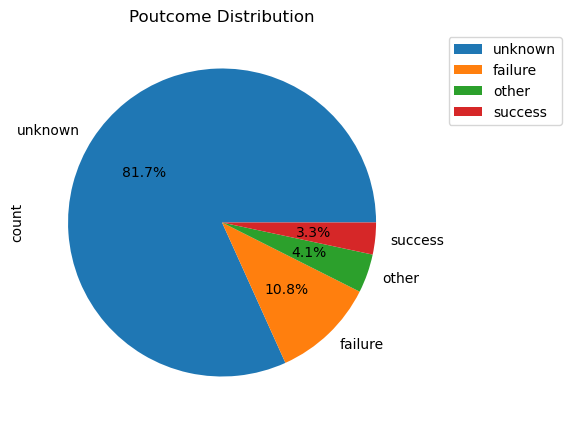

In [46]:
print("Unique values:", df['poutcome'].unique())
print("\nFrequency count:", df['poutcome'].value_counts())
print("\nStatistics summary:", df['poutcome'].describe().T)

# Count Plot
plt.figure(figsize=(9,5))
sns.countplot(x='poutcome', data=df)
plt.title('Poutcome Distribution')
plt.xlabel('Poutcome')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Pie Chart
plt.figure(figsize=(5,5))
df['poutcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Poutcome Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

## Assess the Impact on Campaign Success

In [47]:
# Converting categorical variables into factors
# yes = 1
# no = 0

df['response_rate'] = np.where(df.response=='yes', 1, 0)
df.response_rate.value_counts()

response_rate
0    39924
1     5287
Name: count, dtype: int64

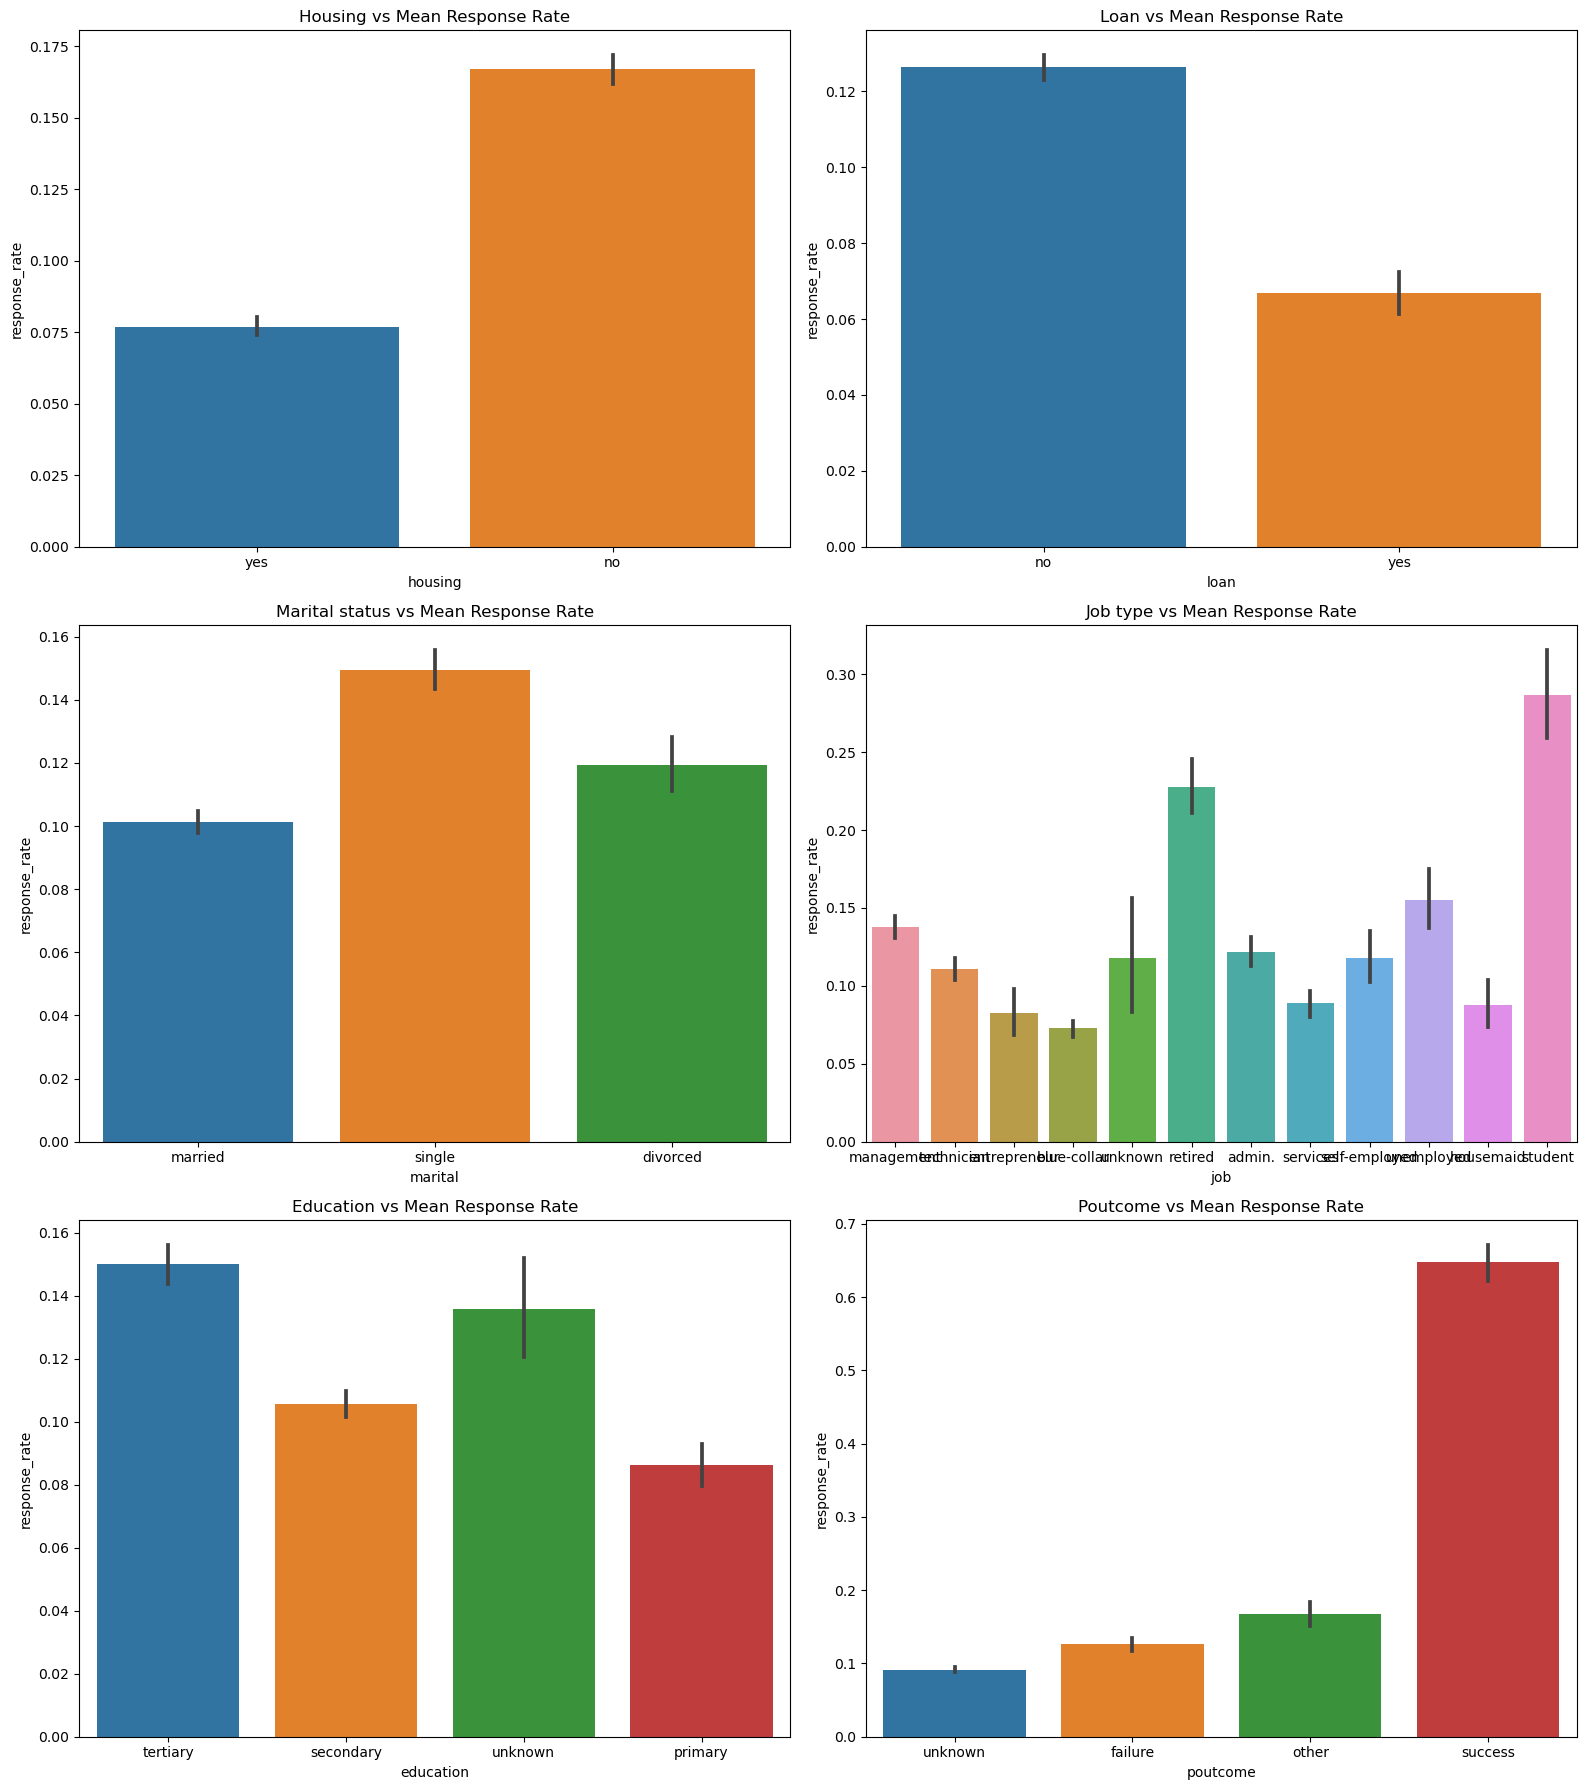

In [48]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Plot the bar graph of Housing status with average value of response_rate
sns.barplot(x="housing", y="response_rate", data=df, estimator=np.mean, ax=axs[0, 0])
axs[0, 0].set_title('Housing vs Mean Response Rate')

# Plot the bar graph of loan status with average value of response_rate
sns.barplot(x="loan", y="response_rate", data=df, estimator=np.mean, ax=axs[0, 1])
axs[0, 1].set_title('Loan vs Mean Response Rate')

# Plot the bar graph of Marital status with average value of response_rate
sns.barplot(x="marital", y="response_rate", data=df, estimator=np.mean, ax=axs[1, 0])
axs[1, 0].set_title('Marital status vs Mean Response Rate')

# Plot the bar graph of Job type with average value of response_rate
sns.barplot(x="job", y="response_rate", data=df, estimator=np.mean, ax=axs[1, 1])
axs[1, 1].set_title('Job type vs Mean Response Rate')

# Plot the bar graph of Education with average value of response_rate
sns.barplot(x="education", y="response_rate", data=df, estimator=np.mean, ax=axs[2, 0])
axs[2, 0].set_title('Education vs Mean Response Rate')

# Plot the bar graph of Poutcome with average value of response_rate
sns.barplot(x="poutcome", y="response_rate", data=df, estimator=np.mean, ax=axs[2, 1])
axs[2, 1].set_title('Poutcome vs Mean Response Rate')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

## Interpretation: Categorical Variables Analysis

#### Investigate the Distribution of Categorical Variables:
##### Job Type
- Print Statements: Provide insights into the unique values, frequency count, and summary statistics of the 'job' variable.
- Count Plot: Visualizes the distribution of job types, showing the count of each job type.
- Pie Chart: Visualizes the distribution of job types as a percentage of the total.

##### Education
- Print Statements: Provide insights into the unique values, frequency count, and summary statistics of the 'education' variable.
- Count Plot: Visualizes the distribution of education levels, showing the count of each education level.
- Pie Chart: Visualizes the distribution of education levels as a percentage of the total.

##### Marital Status
- Print Statements: Provide insights into the unique values, frequency count, and summary statistics of the 'marital' variable.
- Count Plot: Visualizes the distribution of marital statuses, showing the count of each marital status.
- Pie Chart: Visualizes the distribution of marital statuses as a percentage of the total.

##### Poutcome
- Print Statements: Provide insights into the unique values, frequency count, and summary statistics of the 'poutcome' variable.
- Count Plot: Visualizes the distribution of 'poutcome' values, showing the count of each value.
- Pie Chart: Visualizes the distribution of 'poutcome' values as a percentage of the total.

#### Assess the Impact on Campaign Success:
- Frequency Count: Provides the count of 'yes' and 'no' responses after converting them into numerical values (1 and 0, respectively).

- Bar Plots: Visualize the average response rate for each category of the categorical variables, helping to identify which categories have a higher or lower response rate.


## 6. Temporal Analysis
a. Investigate temporal patterns in the success of the campaign over time.

b. Analyze if specific months or days exhibit superior campaign performance.

## Investigate Temporal Patterns

In [49]:
# Extract day of the week from 'day'
df['week'] = df['day'] % 7

# Map day of week numbers to week day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['week'] = df['week'].map(day_mapping)

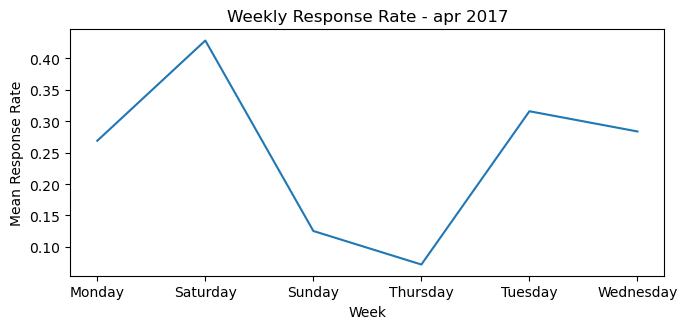

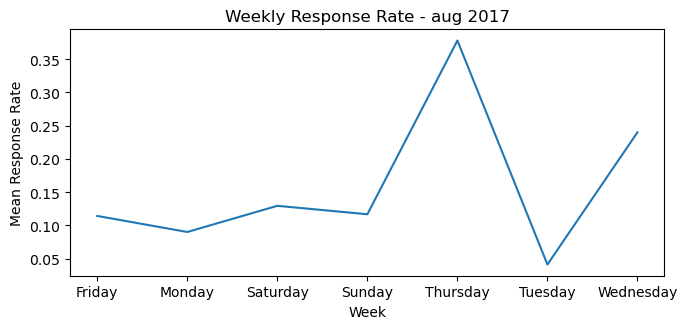

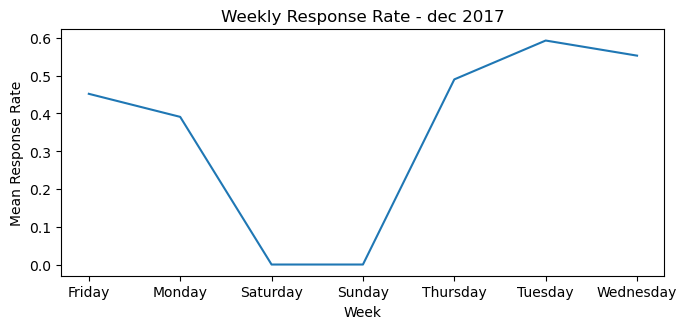

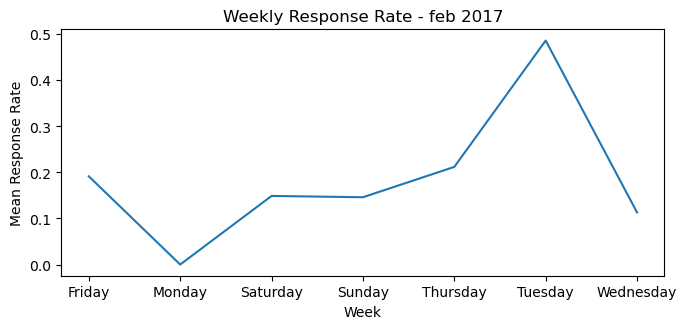

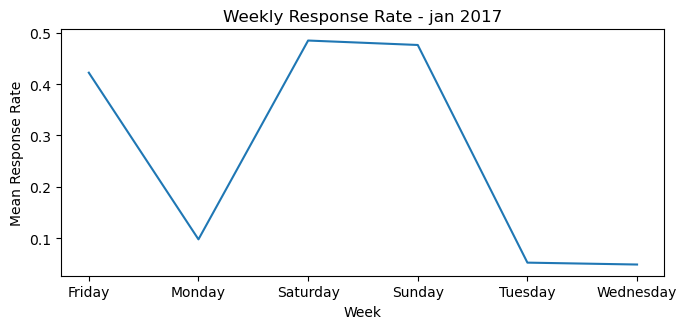

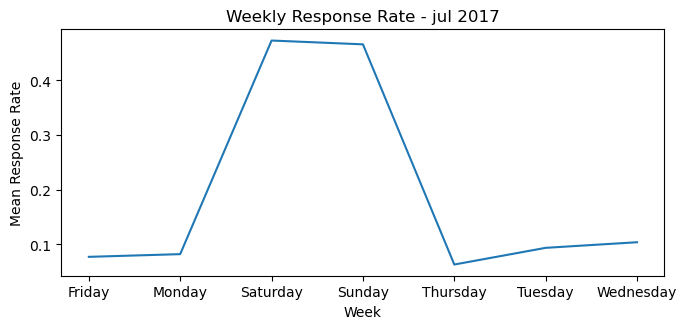

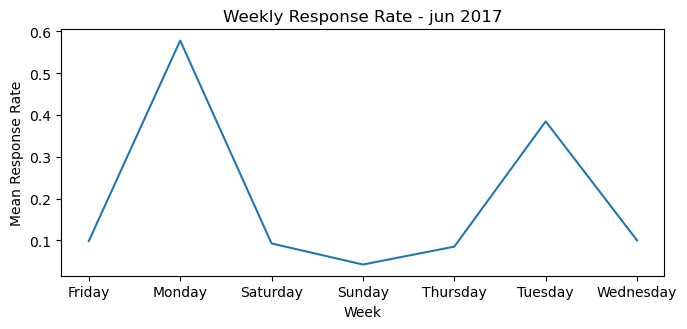

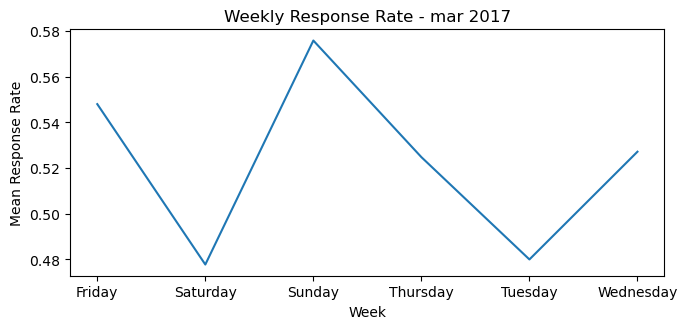

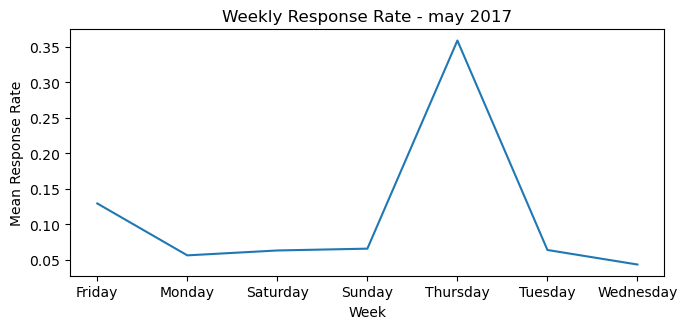

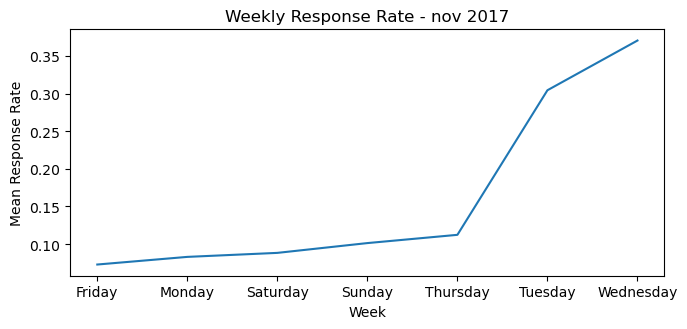

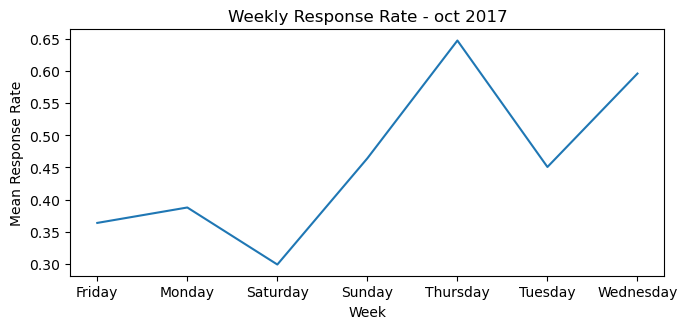

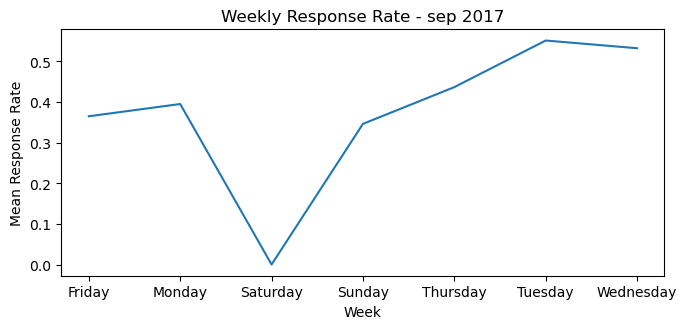

In [50]:
# Group by day of week, calculate mean response rate
weekly_response_rate = df.groupby(['week', 'months', 'year'])['response_rate'].mean().reset_index()

# Loop through months and years
for (month, year), data in weekly_response_rate.groupby(['months', 'year']):
    # Create figure with proper size
    plt.figure(figsize=(7,3.4))
    
    # Create lineplot
    sns.lineplot(data=data, x='week', y='response_rate')
    
    # Set title and labels
    plt.title(f'Weekly Response Rate - {month} {year}')
    plt.xlabel('Week')
    plt.ylabel('Mean Response Rate')
    
    # Show plot
    plt.tight_layout()
    plt.show()

## Analyze Specific Months or Days

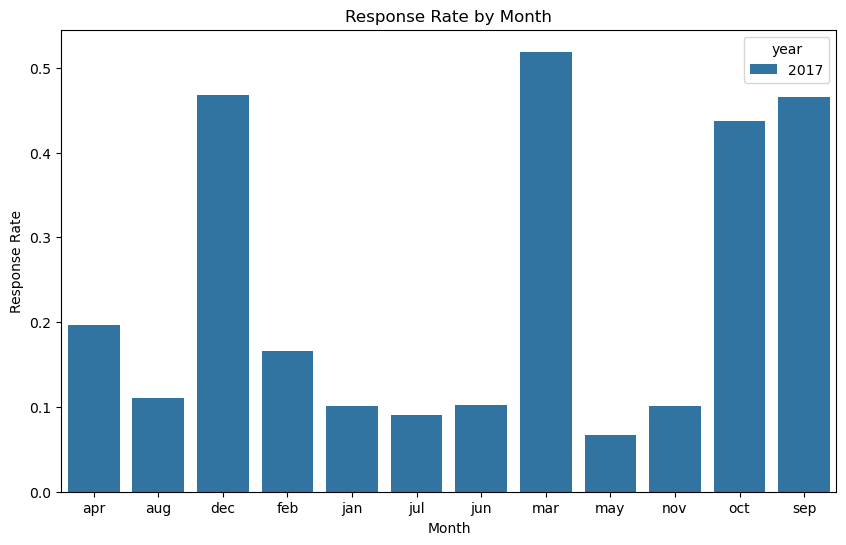

In [51]:
# Calculate the response rate by month and year
response_rate_by_month = df.groupby([df['months'], df['year']])['response_rate'].mean().reset_index()

# Plot the response rate by month using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=response_rate_by_month, x='months', y='response_rate', hue='year')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.title('Response Rate by Month')
plt.show()

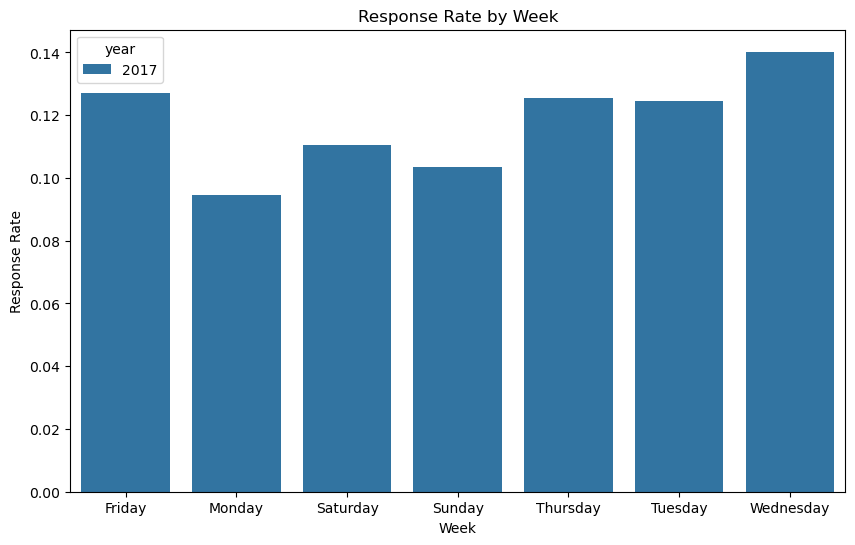

In [52]:
# Calculate the response rate by week and year
response_rate_by_week = df.groupby([df['week'], df['year']])['response_rate'].mean().reset_index()

# Plot the response rate by week using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=response_rate_by_week, x='week', y='response_rate', hue='year')
plt.xlabel('Week')
plt.ylabel('Response Rate')
plt.title('Response Rate by Week')
plt.show()

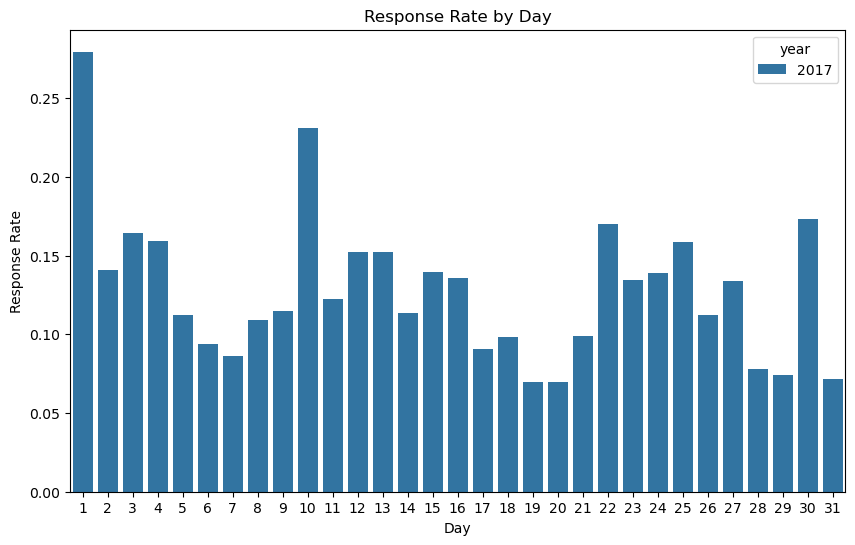

In [53]:
# Calculate the response rate by day and year
response_rate_by_day = df.groupby([df['day'], df['year']])['response_rate'].mean().reset_index()

# Plot the response rate by week using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=response_rate_by_day, x='day', y='response_rate', hue='year')
plt.xlabel('Day')
plt.ylabel('Response Rate')
plt.title('Response Rate by Day')
plt.show()

## Interpretation: Temporal Analysis

#### Investigate Temporal Patterns:
- Day of the Week: The 'week' column now contains the weekday names corresponding to the 'day' column values.
- Line Plots: Visualize the mean response rate by day of the week for each month and year, helping to identify patterns and trends over time.

#### Analyze Specific Months or Days:
- Bar Plot: Visualizes the mean response rate by month for each year, helping to identify patterns and trends over time.
- Bar Plot: Visualizes the mean response rate by week for each year, helping to identify patterns and trends over time.
- Bar Plot: Visualizes the mean response rate by day for each year, helping to identify patterns and trends over time.


## 7. Feature Engineering
a. Introduce new features that may enhance prediction, such as creating age groups or income categories.

b. Apply encoding techniques to transform categorical variables if necessary.

##  Introduce New Features

## Age Groups

In [54]:
df['age_group'] = pd.cut(df['age'],bins=[0,30,40,50,60,70,100],
                         labels=['Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly', 'Very Elderly'])

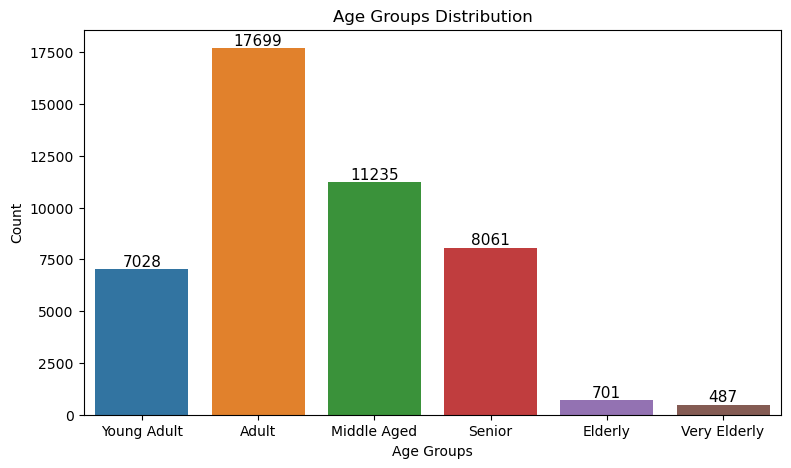

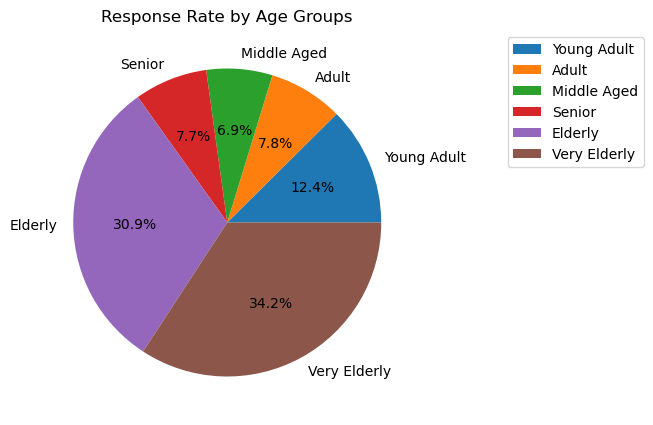

In [55]:
# Count Plot
plt.figure(figsize=(9,5))
sns.countplot(x='age_group', data=df)
plt.title('Age Groups Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Calculate the response rate by Age Groups
response_rate_by_age_group = df.groupby('age_group')['response_rate'].mean().reset_index()

# Plot the response rate by Age Groups using Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(response_rate_by_age_group['response_rate'], labels = response_rate_by_age_group['age_group'], autopct='%1.1f%%')
plt.title('Response Rate by Age Groups')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

## Income Categories

In [56]:
df['income_category'] = pd.cut(df['salary'], bins=[-1, 25000, 50000, 75000, 150000], 
                               labels=['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income'])

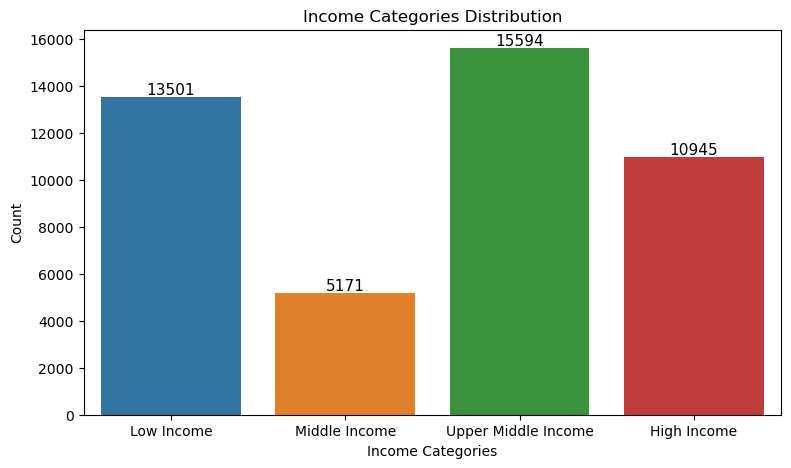

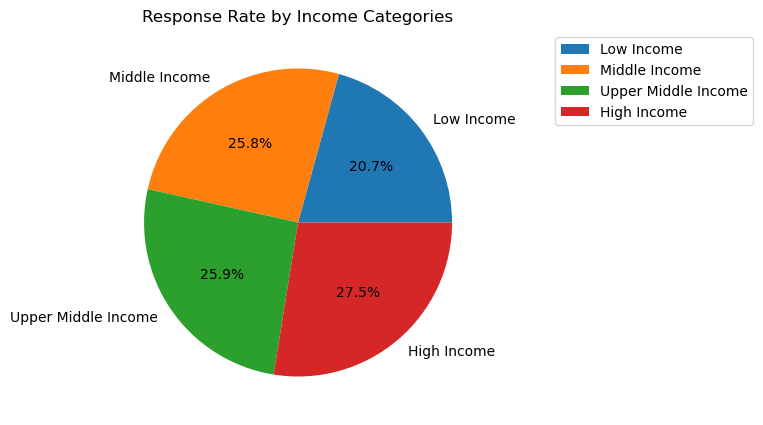

In [57]:
# Count Plot
plt.figure(figsize=(9,5))
sns.countplot(x='income_category', data=df)
plt.title('Income Categories Distribution')
plt.xlabel('Income Categories')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
                   ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Calculate the response rate by Income Categories
response_rate_by_income_category = df.groupby('income_category')['response_rate'].mean().reset_index()

# Plot the response rate by Income Categories using Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(response_rate_by_income_category['response_rate'], labels = response_rate_by_income_category['income_category'], autopct='%1.1f%%')
plt.title('Response Rate by Income Categories')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()

## Apply Encoding Techniques

In [58]:
# Define the categorical columns

categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.info()
categorical_columns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marital    45211 non-null  object
 1   targeted   45211 non-null  object
 2   housing    45211 non-null  object
 3   loan       45211 non-null  object
 4   contact    45211 non-null  object
 5   poutcome   45211 non-null  object
 6   response   45211 non-null  object
 7   job        45211 non-null  object
 8   education  45211 non-null  object
 9   months     45211 non-null  object
 10  week       45211 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


marital targeted housing loan  contact poutcome response           job  \
0  married      yes     yes   no  unknown  unknown       no    management   
1   single      yes     yes   no  unknown  unknown       no    technician   
2  married      yes     yes  yes  unknown  unknown       no  entrepreneur   
3  married       no     yes   no  unknown  unknown       no   blue-collar   
4   single       no      no   no  unknown  unknown       no       unknown   

   education months      week  
0   tertiary    may  Saturday  
1  secondary    may  Saturday  
2  secondary    may  Saturday  
3    unknown    may  Saturday  
4    unknown    may  Saturday

In [59]:
# Create a ColumnTransformer with the specified encoders

transformer = ColumnTransformer(
    transformers=[
        ('oe', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']]), ['education']),
        ('ohe', OneHotEncoder(sparse=False, drop="first"), ['contact','poutcome','job','marital','months','week']),
    ], remainder='passthrough')

# Fit and transform the DataFrame
df_oe_ohe = transformer.fit_transform(df)

# Convert the encoded data back to a DataFrame
df_oe_ohe = pd.DataFrame(df_oe_ohe, columns=transformer.get_feature_names_out())

# Convert the encoded data back to a DataFrame
df_oe_ohe = pd.DataFrame(df_oe_ohe, columns=transformer.get_feature_names_out())

# Define the columns to label encode
columns_le = ['targeted', 'housing', 'loan']

# Initialize a LabelEncoder for each column
label_encoders = {column: LabelEncoder() for column in columns_le}

# Fit and transform each column
for column in columns_le:
    df[column] = label_encoders[column].fit_transform(df[column])
    
# Merge the ordinal/one-hot encoded DataFrame with the label-encoded columns
df_encoded = pd.concat([df_oe_ohe, df[columns_le]], axis=1)

# Display the merged DataFrame
print(df_encoded.shape)
df_encoded.head()

(45211, 53)


oe__education ohe__contact_telephone ohe__contact_unknown  \
0           2.0                    0.0                  1.0   
1           1.0                    0.0                  1.0   
2           1.0                    0.0                  1.0   
3           3.0                    0.0                  1.0   
4           3.0                    0.0                  1.0   

  ohe__poutcome_other ohe__poutcome_success ohe__poutcome_unknown  \
0                 0.0                   0.0                   1.0   
1                 0.0                   0.0                   1.0   
2                 0.0                   0.0                   1.0   
3                 0.0                   0.0                   1.0   
4                 0.0                   0.0                   1.0   

  ohe__job_blue-collar ohe__job_entrepreneur ohe__job_housemaid  \
0                  0.0                   0.0                0.0   
1                  0.0                   0.0                0.0   
2                  0.0                   1.0                0.0   
3                  1.0                   0.0                0.0   
4                  0.0                   0.0                0.0   

  ohe__job_management  ... remainder__duration remainder__campaign  \
0                 1.0  ...                4.35                   1   
1                 0.0  ...            2.516667                   1   
2                 0.0  ...            1.266667                   1   
3                 0.0  ...            1.533333                   1   
4                 0.0  ...                 3.3                   1   

  remainder__response remainder__year remainder__response_rate  \
0                  no            2017                        0   
1                  no            2017                        0   
2                  no            2017                        0   
3                  no            2017                        0   
4                  no            2017                        0   

  remainder__age_group remainder__income_category targeted housing loan  
0               Senior                High Income        1       1    0  
1          Middle Aged        Upper Middle Income        1       1    0  
2                Adult                High Income        1       1    1  
3          Middle Aged                 Low Income        0       1    0  
4                Adult                 Low Income        0       0    0  

[5 rows x 53 columns]

## Interpretation: Feature Engineering

#### Introduce New Features:
##### Age Groups:
- Age Groups: The 'age_group' column provides categorical labels based on the specified age ranges.
- Count Plot: Visualizes the distribution of age groups, showing the count of each age group.
- Pie Chart: Visualizes the response rate by age group, showing the proportion of each age group's response rate.
##### Income Categories:
- Income categories: The ' income_category column provides categorical labels based on the specified income ranges.
- Count Plot: Visualizes the distribution of income categories, showing the count of each income category.
- Pie Chart: Visualizes the response rate by income category, showing the proportion of each income category's response rate.
#### Apply Encoding Techniques:
- Categorical Columns: The 'job', 'education', and 'marital' such as columns are identified as categorical columns.
- Encoded DataFrame: The df_encoded DataFrame contains the encoded categorical variables using ordinal, one-hot, and label encoding.


## 8. Correlation Analysis
a. Examine correlations between independent variables to identify multicollinearity.

b. Evaluate how correlated features may influence the target variable.

## Examine Correlations Between Independent Variables

In [60]:
# Compute the correlation matrix

df_corr = df.select_dtypes(include=['number'])
df_corr = df_corr.drop(['year'], axis=1)
corr_matrix = df_corr.corr()
corr_matrix

age    salary   balance  targeted   housing      loan  \
age            1.000000  0.024366  0.097753  0.113262 -0.185497 -0.015708   
salary         0.024366  1.000000  0.055469 -0.222868 -0.048965  0.017749   
balance        0.097753  0.055469  1.000000 -0.040699 -0.068768 -0.084350   
targeted       0.113262 -0.222868 -0.040699  1.000000  0.075543  0.066297   
housing       -0.185497 -0.048965 -0.068768  0.075543  1.000000  0.041323   
loan          -0.015708  0.017749 -0.084350  0.066297  0.041323  1.000000   
day           -0.009185  0.027864  0.004503 -0.012891 -0.027982  0.011370   
duration      -0.004645 -0.009937  0.021560 -0.010280  0.005075 -0.012412   
campaign       0.004851  0.015005 -0.014578 -0.002597 -0.023599  0.009980   
response_rate  0.025069  0.020024  0.052895 -0.068935 -0.139180 -0.068136   

                    day  duration  campaign  response_rate  
age           -0.009185 -0.004645  0.004851       0.025069  
salary         0.027864 -0.009937  0.015005       0.020024  
balance        0.004503  0.021560 -0.014578       0.052895  
targeted      -0.012891 -0.010280 -0.002597      -0.068935  
housing       -0.027982  0.005075 -0.023599      -0.139180  
loan           0.011370 -0.012412  0.009980      -0.068136  
day            1.000000 -0.030206  0.162490      -0.028265  
duration      -0.030206  1.000000 -0.084570       0.394531  
campaign       0.162490 -0.084570  1.000000      -0.073172  
response_rate -0.028265  0.394531 -0.073172       1.000000

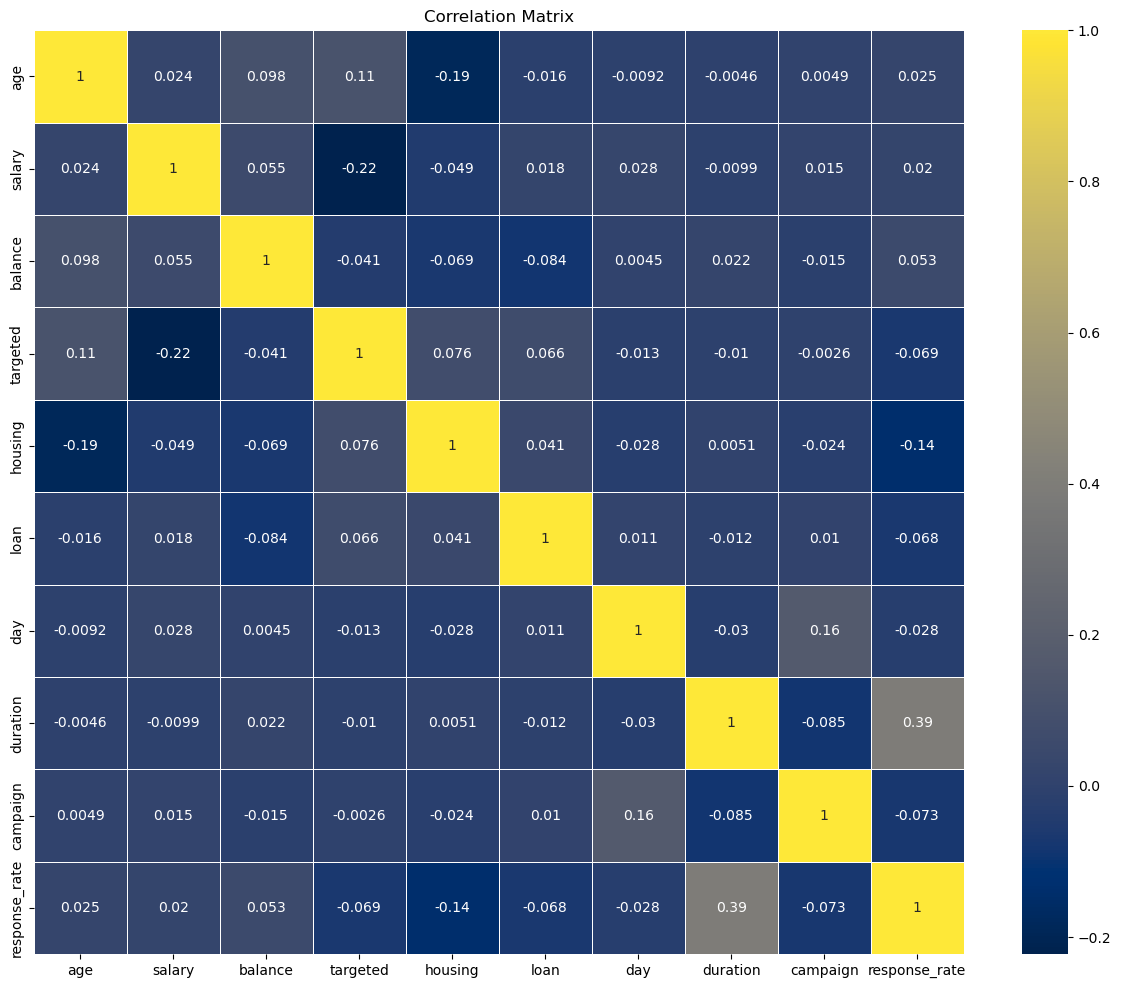

In [61]:
# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Identify variables with high multicollinearity
threshold = 0.7
high_multicollinearity = (corr_matrix.abs() > threshold).stack().reset_index()
high_multicollinearity = high_multicollinearity[high_multicollinearity['level_0'] != high_multicollinearity['level_1']]

# Display pairs of variables with high multicollinearity
high_multicollinearity[['level_0', 'level_1', 0]].head()

level_0   level_1      0
1     age    salary  False
2     age   balance  False
3     age  targeted  False
4     age   housing  False
5     age      loan  False

## Evaluate Correlation with Target Variable

In [63]:
# Select the target variable
target_variable = 'response_rate'

# Analyze the correlation of features with the target variable
correlation_with_target = corr_matrix[target_variable].abs().sort_values(ascending=False)

# Display the correlation of features with the target variable
print("Correlation of features with the target variable:")
print(correlation_with_target)

Correlation of features with the target variable:
response_rate    1.000000
duration         0.394531
housing          0.139180
campaign         0.073172
targeted         0.068935
loan             0.068136
balance          0.052895
day              0.028265
age              0.025069
salary           0.020024
Name: response_rate, dtype: float64


## Interpretation: Correlation Analysis

#### Examine Correlations Between Independent Variables:
- Correlation Matrix: The correlation matrix shows the pairwise correlations between numerical variables.
- Heatmap: The heatmap visualizes the correlation matrix, making it easy to identify patterns and relationships between variables.
- Pairs of Variables with High Multicollinearity: The output shows pairs of variables that have an absolute correlation greater than the specified threshold.
#### Evaluate Correlation with Target Variable:
- Correlation with the Target Variable: The output shows the absolute correlations of all features with the target variable in descending order.

## 9. Outlier Detection and Handling
a. Identify and rectify outliers that could impact the analysis and predictions.

## Identify and Rectify Outliers

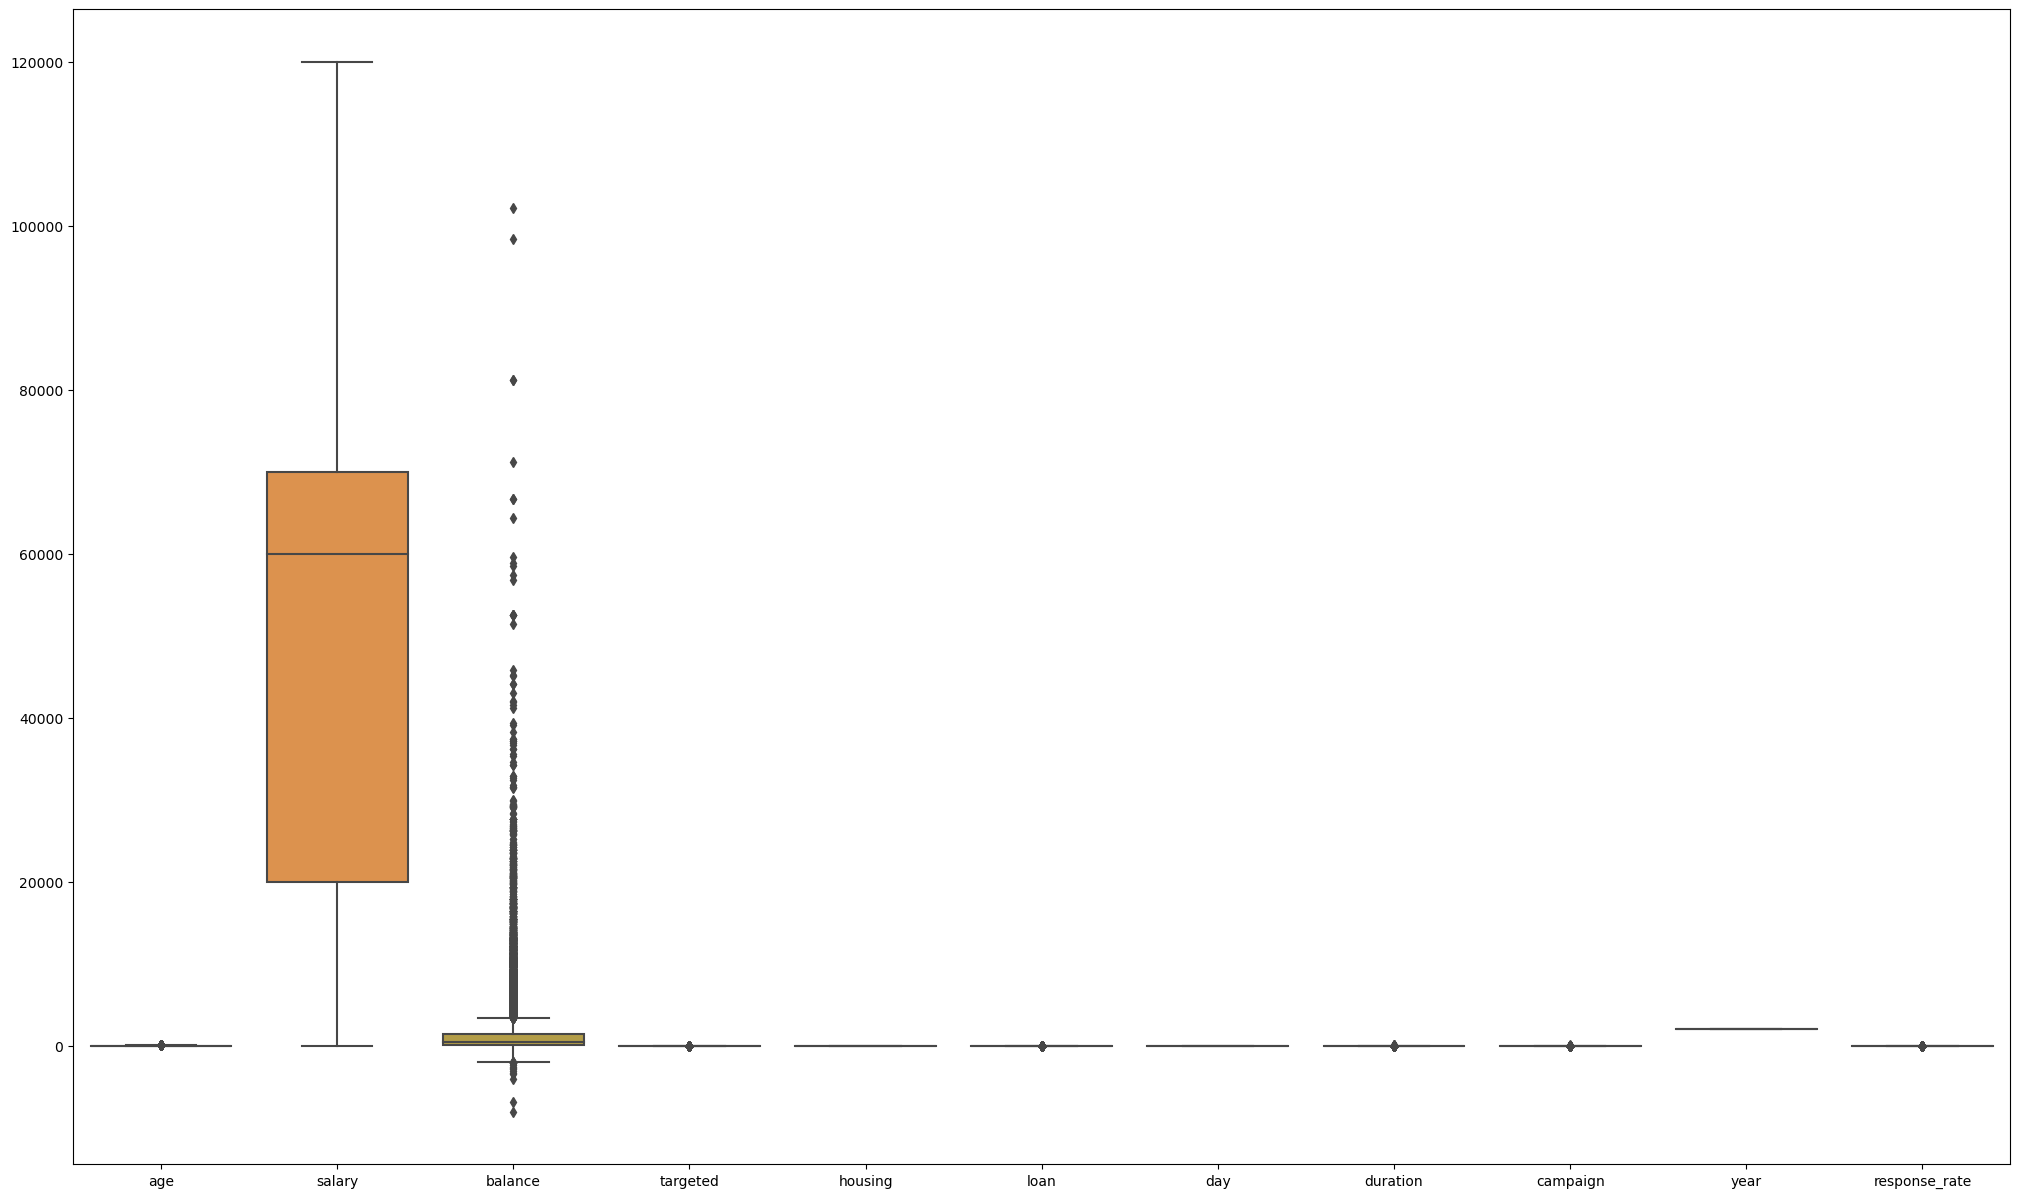

In [64]:
plt.figure(figsize=(25,15))

sns.boxplot(df)

plt.show()

## Age

<Axes: >

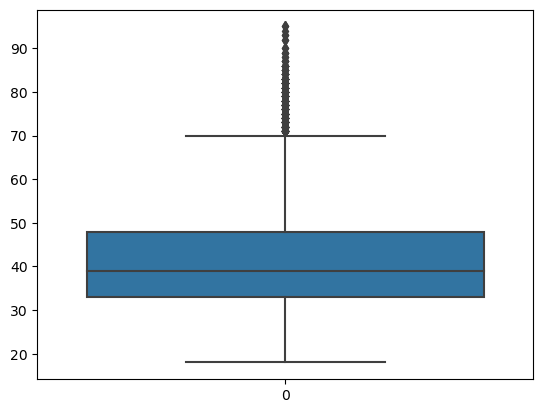

In [65]:
sns.boxplot(df['age'])

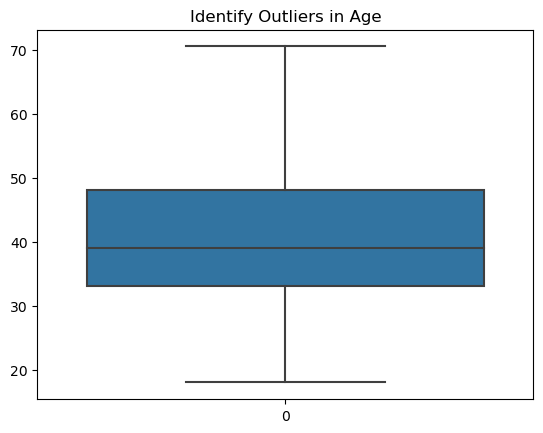

In [66]:
Q1 = df['age'].quantile(0.25)

Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])

sns.boxplot(df['age'])

plt.title("Identify Outliers in Age")

plt.show()

## Balance

<Axes: >

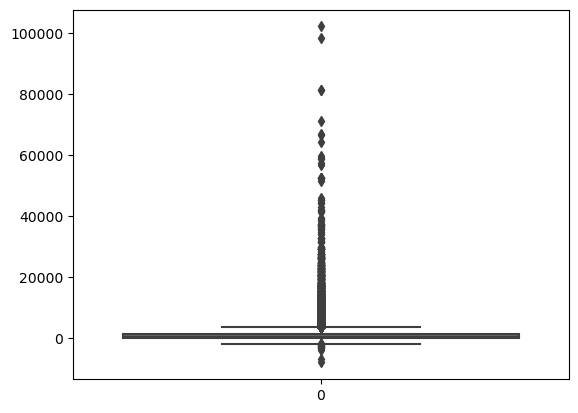

In [67]:
sns.boxplot(df['balance'])

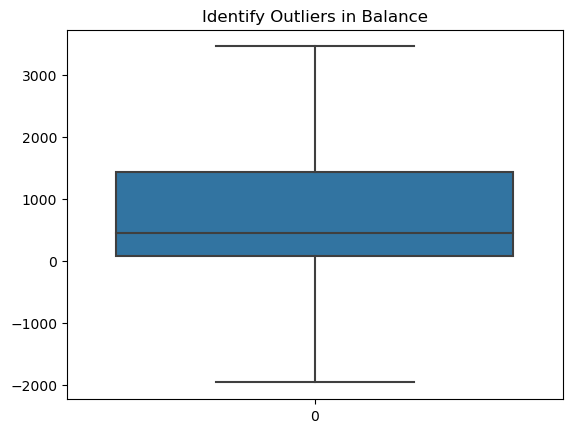

In [68]:
Q1 = df['balance'].quantile(0.25)

Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['balance'] = np.where(df['balance'] > upper_bound, upper_bound, df['balance'])

df['balance'] = np.where(df['balance'] < lower_bound, lower_bound, df['balance'])

sns.boxplot(df['balance'])

plt.title("Identify Outliers in Balance")

plt.show()

## Targeted

<Axes: >

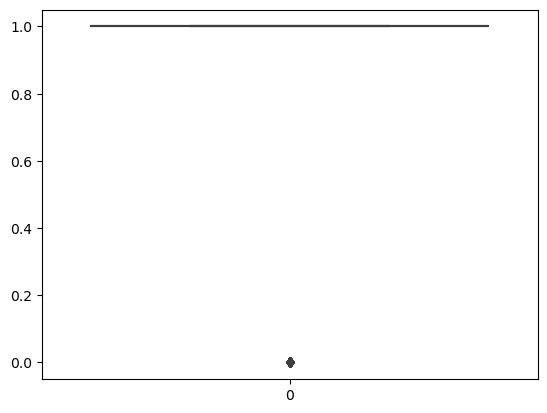

In [69]:
sns.boxplot(df['targeted'])

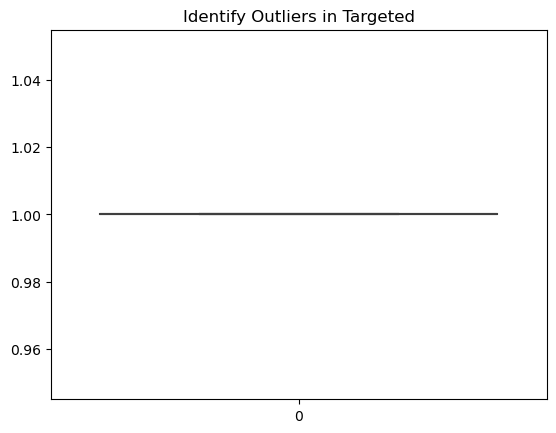

In [70]:
Q1 = df['targeted'].quantile(0.25)

Q3 = df['targeted'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['targeted'] = np.where(df['targeted'] > upper_bound, upper_bound, df['targeted'])

df['targeted'] = np.where(df['targeted'] < lower_bound, lower_bound, df['targeted'])

sns.boxplot(df['targeted'])

plt.title("Identify Outliers in Targeted")

plt.show()

## Loan

<Axes: >

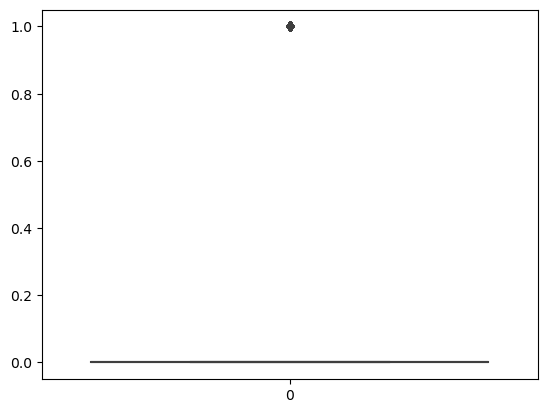

In [71]:
sns.boxplot(df['loan'])

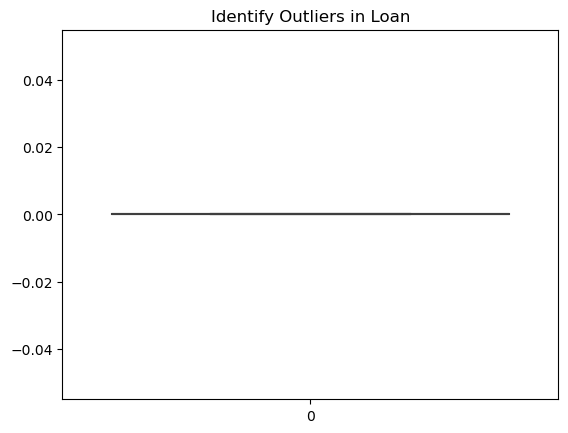

In [72]:
Q1 = df['loan'].quantile(0.25)

Q3 = df['loan'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['loan'] = np.where(df['loan'] > upper_bound, upper_bound, df['loan'])

df['loan'] = np.where(df['loan'] < lower_bound, lower_bound, df['loan'])

sns.boxplot(df['loan'])

plt.title("Identify Outliers in Loan")

plt.show()

## Duration

<Axes: >

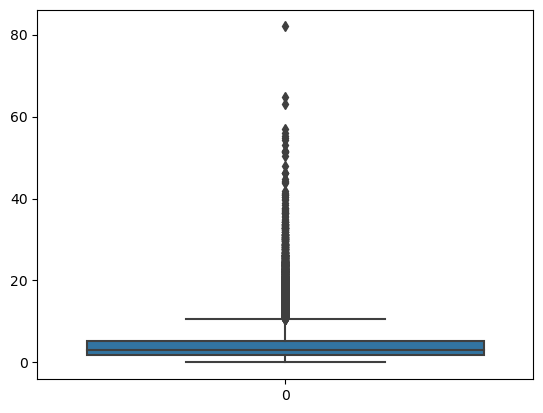

In [73]:
sns.boxplot(df['duration'])

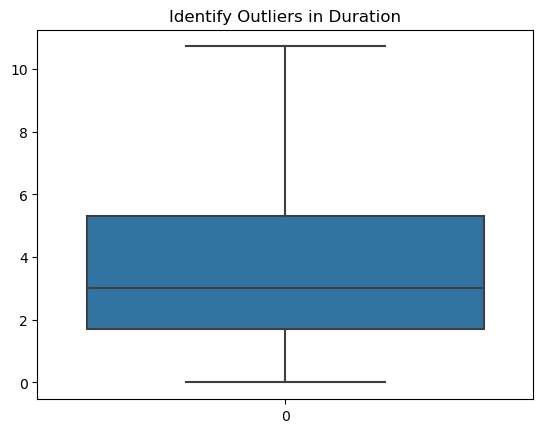

In [74]:
Q1 = df['duration'].quantile(0.25)

Q3 = df['duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['duration'] = np.where(df['duration'] > upper_bound, upper_bound, df['duration'])

df['duration'] = np.where(df['duration'] < lower_bound, lower_bound, df['duration'])

sns.boxplot(df['duration'])

plt.title("Identify Outliers in Duration")

plt.show()

## Campaign

<Axes: >

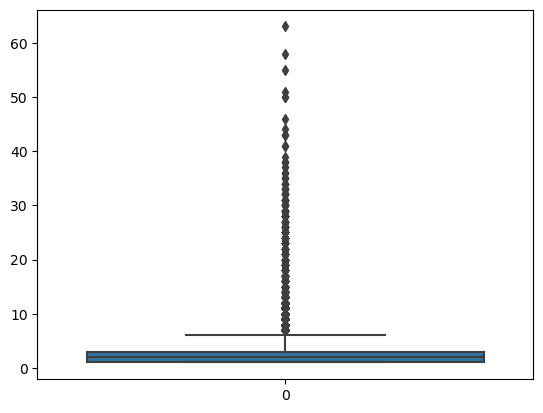

In [75]:
sns.boxplot(df['campaign'])

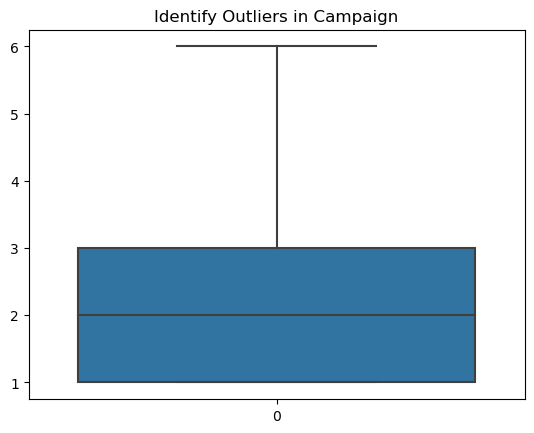

In [76]:
Q1 = df['campaign'].quantile(0.25)

Q3 = df['campaign'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['campaign'] = np.where(df['campaign'] > upper_bound, upper_bound, df['campaign'])

df['campaign'] = np.where(df['campaign'] < lower_bound, lower_bound, df['campaign'])

sns.boxplot(df['campaign'])

plt.title("Identify Outliers in Campaign")

plt.show()

## Response Rate

<Axes: >

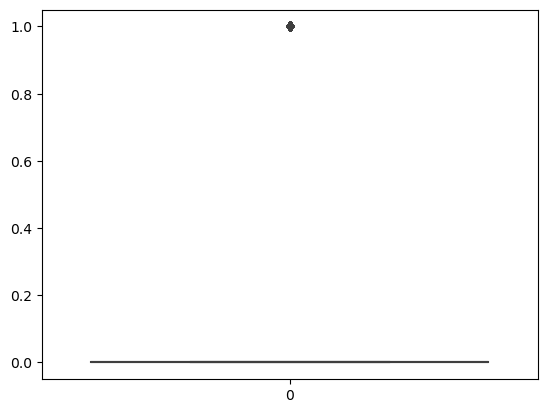

In [77]:
sns.boxplot(df['response_rate'])

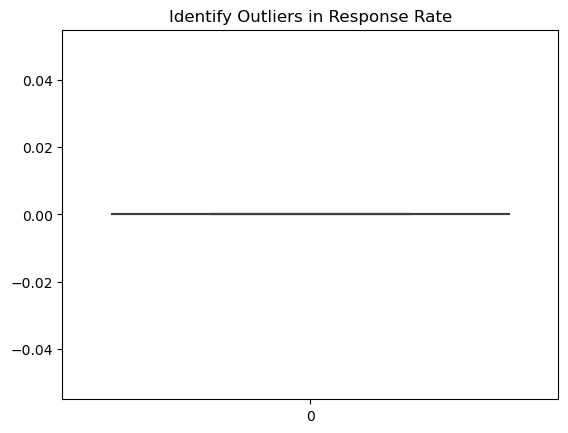

In [78]:
Q1 = df['response_rate'].quantile(0.25)

Q3 = df['response_rate'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df['response_rate'] = np.where(df['response_rate'] > upper_bound, upper_bound, df['response_rate'])

df['response_rate'] = np.where(df['response_rate'] < lower_bound, lower_bound, df['response_rate'])

sns.boxplot(df['response_rate'])

plt.title("Identify Outliers in Response Rate")

plt.show()

## Visualize the Updated Boxplot

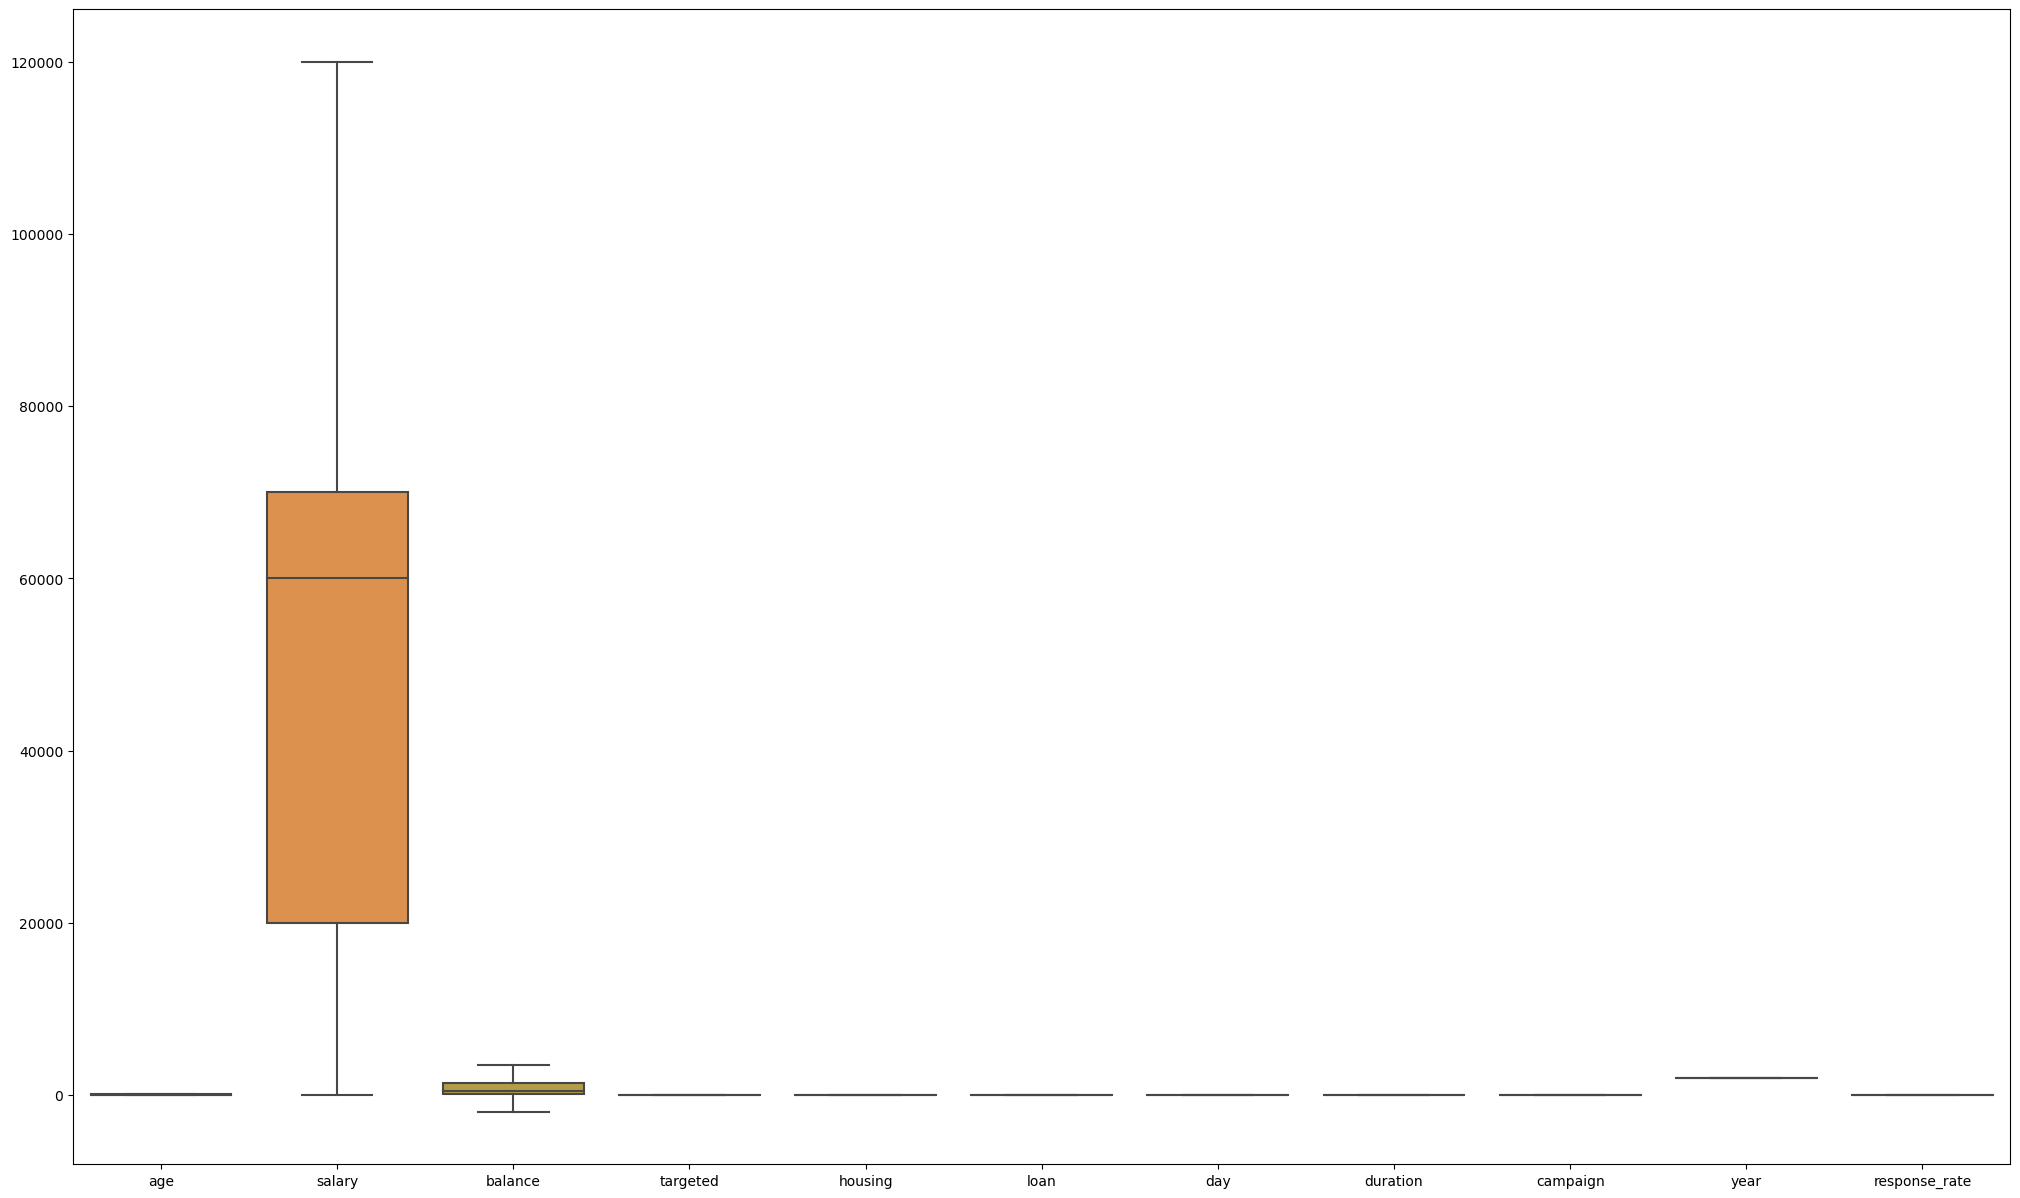

In [79]:
plt.figure(figsize=(25,15))

sns.boxplot(df)

plt.show()

## Check skewness in dataset

In [80]:
z = df.select_dtypes(include = ['number'])
z.skew()

age              0.530195
salary           0.137829
balance          1.097802
targeted         0.000000
housing         -0.224766
loan             0.000000
day              0.093079
duration         1.037574
campaign         1.099115
year             0.000000
response_rate    0.000000
dtype: float64

## Check kurtosis in dataset

In [81]:
z.kurt()

age             -0.374385
salary          -1.005143
balance          0.007675
targeted         0.000000
housing         -1.949566
loan             0.000000
day             -1.059897
duration         0.107564
campaign         0.070302
year             0.000000
response_rate    0.000000
dtype: float64

## Interpretation: Outlier Detection and Handling

#### Identify and Rectify Outliers:
- Visualize Boxplot: The boxplot helps identify outliers by showing the distribution of each numerical variable & outliers mainly in the "balance" variable, with a few in "age", ”targeted”, “ loan”,  "duration", “campaign” and “ response_rate”  . The "salary" variable does not have outliers, while “housing”,  "day," and "year" have none visible beyond the whiskers.
- Original Boxplots: The original boxplots show the distribution of each column, including any outliers. Outliers are represented by points outside the whiskers of the boxplot. 
- Updated Boxplots: The updated boxplots show the distribution of each column after outliers have been replaced with the boundary values. This can help in normalizing the data and making it more suitable for analysis and modeling.
- Visualize the Updated Boxplot:  The updated boxplots show the distribution of each column after outliers have been handled. The whiskers of the boxplots represent the range of the data excluding outliers, and the box itself represents the interquartile range (IQR). 
- The skewness values indicate that 'age', 'salary', 'housing' and 'day' are Negative Skew (left-skewed), 'balance', 'duration', and 'campaign' are Positive Skew (right-skewed), while 'targeted', 'loan', 'year'  and 'Response_rate' are  No Skew (symmetric).
- The kurtosis values indicate that 'salary', 'housing' and 'day' are High Kurtosis (leptokurtic), 'age', 'balance', 'duration', and 'campaign' are Low Kurtosis (platykurtic), while 'targeted', 'loan', 'year'  and 'Response_rate' are  Mesokurtic (normal).



## Recommendations:

Offer actionable insights based on the analysis, proposing areas where the bank can enhance its positive response rate. Consider factors such as customer demographics, campaign timing, and communication strategies.


#### Based on the analysis conducted, here are some actionable insights and recommendations for the bank to enhance its positive response rate:

## 1. Customer Demographics
### Age Group Targeting:

- Young Adults (18-30): This group may be more receptive to digital campaigns and flexible loan options. Campaigns to highlight convenience and technology integration.
- Middle-Aged Adults (31-50): This group may be more interested in long-term financial planning and security. Emphasize stability, long-term benefits, and family-oriented services.
- Seniors (51-70): Focus on simplified processes, personalized services, and retirement planning. Highlight ease of use and trustworthiness.
### Income Categories:

- Low Income: Offer affordable loan options and highlight the benefits of small, manageable payments.
- Middle Income: Provide a range of loan Categories that cater to different needs, such as home loans, car loans, and education loans.
- High Income: Offer premium services, investment opportunities, and personalized financial planning.
## 2. Campaign Timing
### Seasonal Campaigns:

- Festive Seasons: Launch campaigns during festive periods when people are more likely to make purchases or need extra funds.
- Tax Seasons: Offer special loan Categories or financial advice related to tax planning.
- Back-to-School: Target families with education loan options during the back-to-school season.
### Day of the Week:

- Analyze the data to determine the best day of the week to contact customers. For example, if the data shows higher response rates on weekends, schedule campaigns accordingly.
## 3. Communication Strategies
## Personalization:

- Use customer data to personalize communication. Address customers by name and the message to their specific needs and preferences.
- Segment the customer base and create targeted campaigns for different segments.
### Multi-Channel Approach:

- Utilize multiple channels for communication, including email, SMS, social media, and direct mail.
- Test different channels to see which ones have the highest response rates and focus more efforts on those.
### Follow-Up Strategy:

- Implement a follow-up strategy for customers who do not respond initially. A gentle reminder or a different offer might prompt a response.
- Analyze the optimal number of follow-ups before considering a customer as a non-responder.
## 4. Loan and Campaign Duration
### Loan Duration:

- Offer flexible loan durations to cater to different customer needs. Some may prefer shorter durations with higher payments, while others may prefer longer durations with lower payments.
### Campaign Duration:

- Keep campaigns short and focused to maintain customer interest. Long campaigns may lead to fatigue and reduced response rates.
## 5. Balance and Targeting
### Balance:

- Analyze the balance data to understand customer financial health. Offer products that are suitable for their current financial situation.
- For customers with higher balances, offer premium products or investment opportunities.
### Targeting:

- Use the 'targeted' column to identify customers who have been specifically targeted in previous campaigns. Analyze the response rates for these customers and refine targeting strategies based on the insights.
## 6. Housing and Loan Status
### Housing Status:

- For customers who own a house, offer home equity loans or home improvement loans.
- For renters, offer personal loans or credit products that can help them with their financial needs.
### Loan Status:

- For customers with existing loans, offer refinancing options or additional loan products that can help them consolidate debt.
- For customers without loans, offer introductory loan products with attractive interest rates.
## 7. Response Rate Optimization
### Response Rate Analysis:
- Continuously monitor and analyze the response rate to understand what works and what doesn't.
- Use A/B testing to experiment with different campaign elements such as messaging, offers, and timing.

By implementing these recommendations, the bank can enhance its positive response rate and improve customer engagement and satisfaction.